In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib import rcParams

In [5]:
df = pd.read_csv('dataset/each_post.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,post_text,followers,friends,favourites,statuses,retweets,label,Day_of_week,Exact_data,year,month,day,time
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,Sun,2015-08-30,2015,8,30,07:48:37
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,Sun,2015-08-30,2015,8,30,07:31:33
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,Sat,2015-08-29,2015,8,29,22:11:07
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,Sat,2015-08-29,2015,8,29,18:40:49
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,Sat,2015-08-29,2015,8,29,18:40:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,A day without sunshine is like night.,442,230,7,1063601,0,0,Thu,2017-01-12,2017,1,12,00:14:56
19879,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,Thu,2017-01-12,2017,1,12,00:06:18
19880,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,Thu,2017-01-12,2017,1,12,00:05:42
19881,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0,Thu,2017-01-12,2017,1,12,00:05:22


In [6]:
df=df.drop('Exact_data',axis=1)
df=df.drop('year',axis=1)
df=df.drop('month',axis=1)
df=df.drop('day',axis=1)
df

,post_text,followers,friends,favourites,statuses,retweets,label,Day_of_week,time
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,Sun,07:48:37
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,Sun,07:31:33
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,Sat,22:11:07
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,Sat,18:40:49
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,Sat,18:40:26
...,...,...,...,...,...,...,...,...,...
19878,A day without sunshine is like night.,442,230,7,1063601,0,0,Thu,00:14:56
19879,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,Thu,00:06:18
19880,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,Thu,00:05:42
19881,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0,Thu,00:05:22


In [7]:
df['time']=df['time'].apply(str)
df['hour']=0
for i in range(len(df['hour'])):
    df['hour'][i]=int(df['time'][i][:2])
df

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,post_text,followers,friends,favourites,statuses,retweets,label,Day_of_week,time,hour
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,Sun,07:48:37,7
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,Sun,07:31:33,7
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,Sat,22:11:07,22
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,Sat,18:40:49,18
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,Sat,18:40:26,18
...,...,...,...,...,...,...,...,...,...,...
19878,A day without sunshine is like night.,442,230,7,1063601,0,0,Thu,00:14:56,0
19879,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,Thu,00:06:18,0
19880,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,Thu,00:05:42,0
19881,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0,Thu,00:05:22,0


### Sentiment Analysis Using TextBlob

In [8]:
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["post_text"] = df["post_text"].str.replace("\d","")

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

from textblob import TextBlob

blob_emptyline = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline.append(blob)
    
df_blob = pd.DataFrame(blob_emptyline)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
df = pd.concat([df.reset_index(drop=True), df_blob], axis=1)
df

,post_text,followers,friends,favourites,statuses,retweets,label,Day_of_week,time,hour,polarity,subjectivity
0,years since diagnosed #anxiety #depression. to...,84,211,251,837,0,1,Sun,07:48:37,7,0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,Sun,07:31:33,7,-0.093750,0.750000
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,Sat,22:11:07,22,-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,Sat,18:40:49,18,1.000000,0.875000
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,Sat,18:40:26,18,-0.045833,0.370833
...,...,...,...,...,...,...,...,...,...,...,...,...
19878,day without sunshine like night.,442,230,7,1063601,0,0,Thu,00:14:56,0,0.000000,0.000000
19879,"boren's laws: () charge, ponder. () trouble, d...",442,230,7,1063601,0,0,Thu,00:06:18,0,-0.475000,0.600000
19880,flow chart thoroughly oversold piece program d...,442,230,7,1063601,0,0,Thu,00:05:42,0,0.000000,0.000000
19881,"ships safe harbor, never meant stay there.",442,230,7,1063601,0,0,Thu,00:05:22,0,0.500000,0.500000


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


Text(0.5, 1.0, 'Distribution of Polarity')

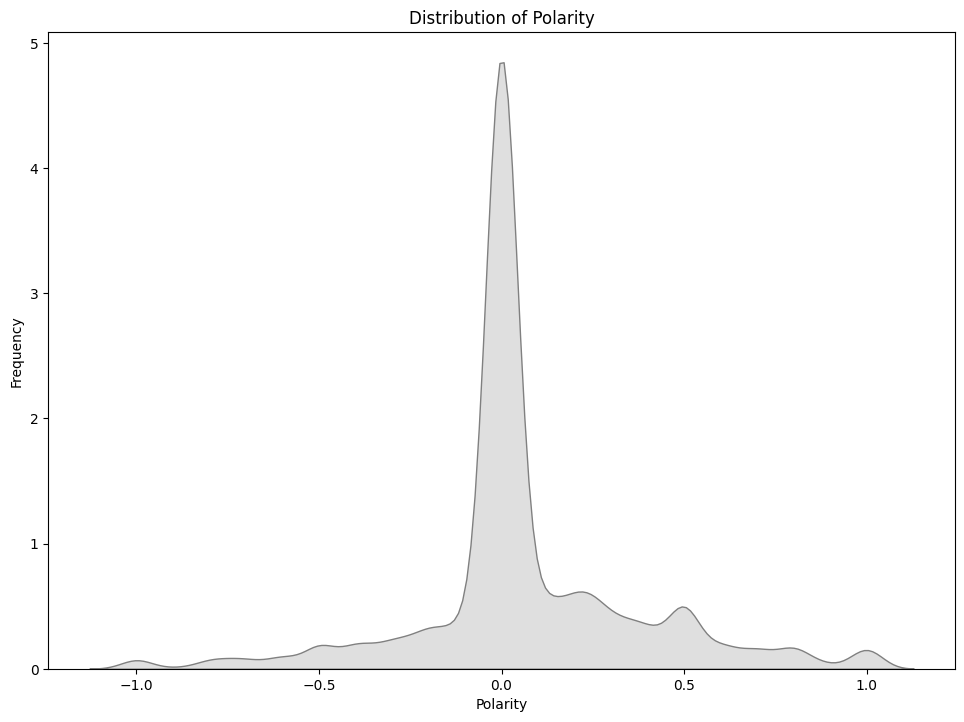

In [10]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.polarity, color="gray", shade = True)
g.set_xlabel("Polarity")
g.set_ylabel("Frequency")
plt.title('Distribution of Polarity')

# Visualization

In [11]:
df.groupby('label').count()['followers']

label
0    9939
1    9944
Name: followers, dtype: int64

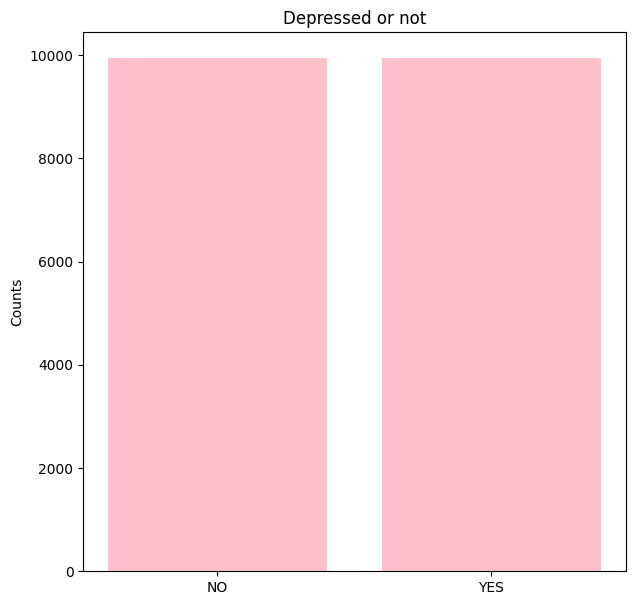

In [12]:
rcParams['figure.figsize'] = 7,7
X=['NO','YES']
Y=df.groupby('label').count()['followers']
fig = plt.figure()
plt.bar(X,Y,color="pink")

plt.ylabel("Counts")
plt.title("Depressed or not")

plt.show() 

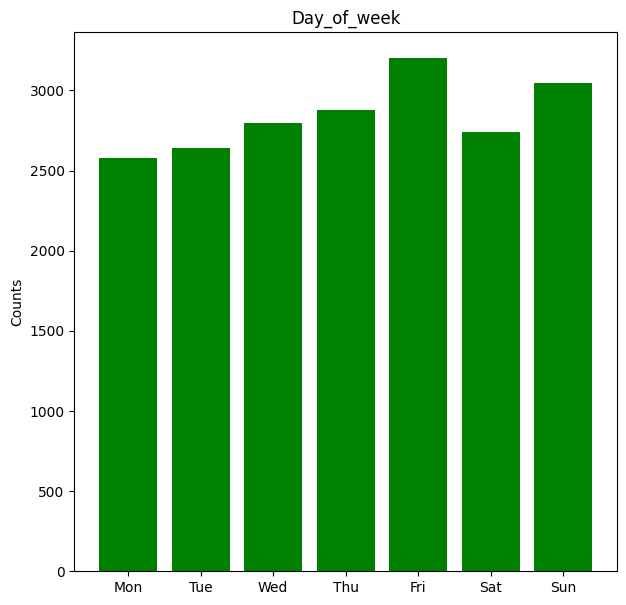

In [13]:
rcParams['figure.figsize'] = 7,7
X=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Y=df.groupby('Day_of_week').count()['label']
fig = plt.figure()
plt.bar(X,Y,color="green")

plt.ylabel("Counts")
plt.title("Day_of_week")

plt.show() 

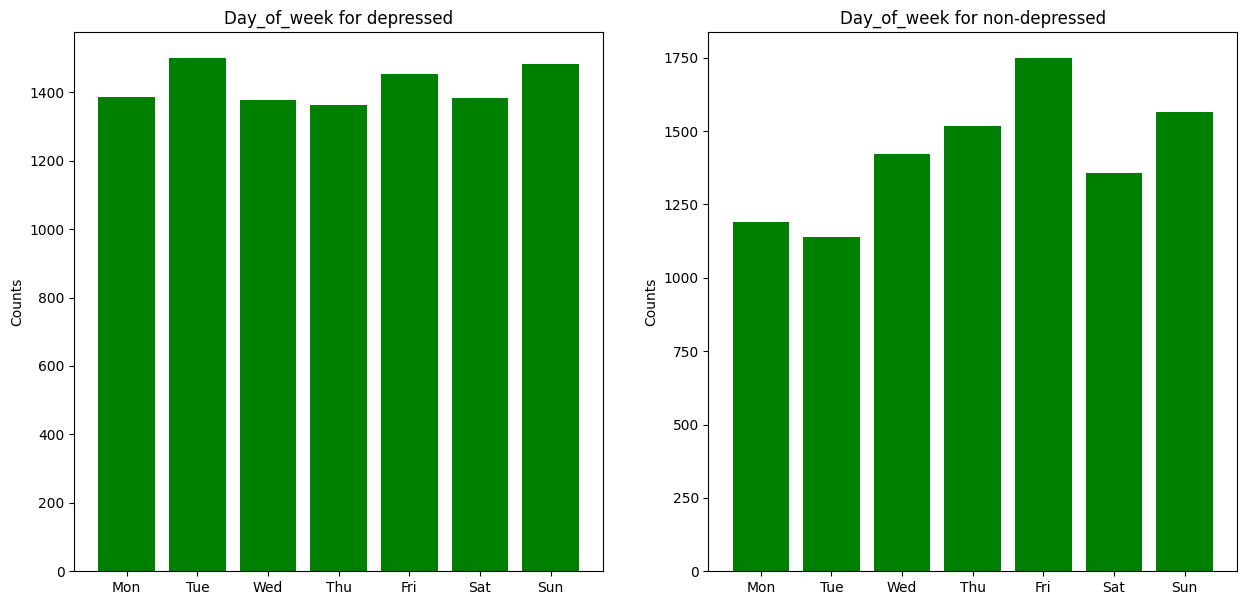

In [14]:
rcParams['figure.figsize'] = 15,7
plt.subplot(1, 2, 1)
X=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Y=df[df['label']==1].groupby('Day_of_week').count()['label']
plt.bar(X,Y,color="green")

plt.ylabel("Counts")
plt.title("Day_of_week for depressed")

#plt.show() 

plt.subplot(1, 2, 2)
X=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Y=df[df['label']==0].groupby('Day_of_week').count()['label']
plt.bar(X,Y,color="green")

plt.ylabel("Counts")
plt.title("Day_of_week for non-depressed")

plt.show() 

In [15]:
modeling=df.copy(deep=True)
dataForModeling = modeling[['followers', 'friends', 'favourites', 'statuses', 'retweets', 'hour','Day_of_week', 'label',"polarity"]]
df = pd.get_dummies(dataForModeling, columns=['Day_of_week'])
df

,followers,friends,favourites,statuses,retweets,hour,label,polarity,Day_of_week_Fri,Day_of_week_Mon,Day_of_week_Sat,Day_of_week_Sun,Day_of_week_Thu,Day_of_week_Tue,Day_of_week_Wed
0,84,211,251,837,0,7,1,0.100000,0,0,0,1,0,0,0
1,84,211,251,837,1,7,1,-0.093750,0,0,0,1,0,0,0
2,84,211,251,837,0,22,1,-0.400000,0,0,1,0,0,0,0
3,84,211,251,837,2,18,1,1.000000,0,0,1,0,0,0,0
4,84,211,251,837,1,18,1,-0.045833,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,442,230,7,1063601,0,0,0,0.000000,0,0,0,0,1,0,0
19879,442,230,7,1063601,0,0,0,-0.475000,0,0,0,0,1,0,0
19880,442,230,7,1063601,0,0,0,0.000000,0,0,0,0,1,0,0
19881,442,230,7,1063601,0,0,0,0.500000,0,0,0,0,1,0,0


In [16]:
order = ["polarity",'followers', 'friends', 'favourites', 'statuses', 'retweets', 'hour','Day_of_week_Mon','Day_of_week_Tue','Day_of_week_Wed','Day_of_week_Thu','Day_of_week_Fri','Day_of_week_Sat','Day_of_week_Sun', 'label']
df = df[order]
df

,polarity,followers,friends,favourites,statuses,retweets,hour,Day_of_week_Mon,Day_of_week_Tue,Day_of_week_Wed,Day_of_week_Thu,Day_of_week_Fri,Day_of_week_Sat,Day_of_week_Sun,label
0,0.100000,84,211,251,837,0,7,0,0,0,0,0,0,1,1
1,-0.093750,84,211,251,837,1,7,0,0,0,0,0,0,1,1
2,-0.400000,84,211,251,837,0,22,0,0,0,0,0,1,0,1
3,1.000000,84,211,251,837,2,18,0,0,0,0,0,1,0,1
4,-0.045833,84,211,251,837,1,18,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,0.000000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19879,-0.475000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19880,0.000000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19881,0.500000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

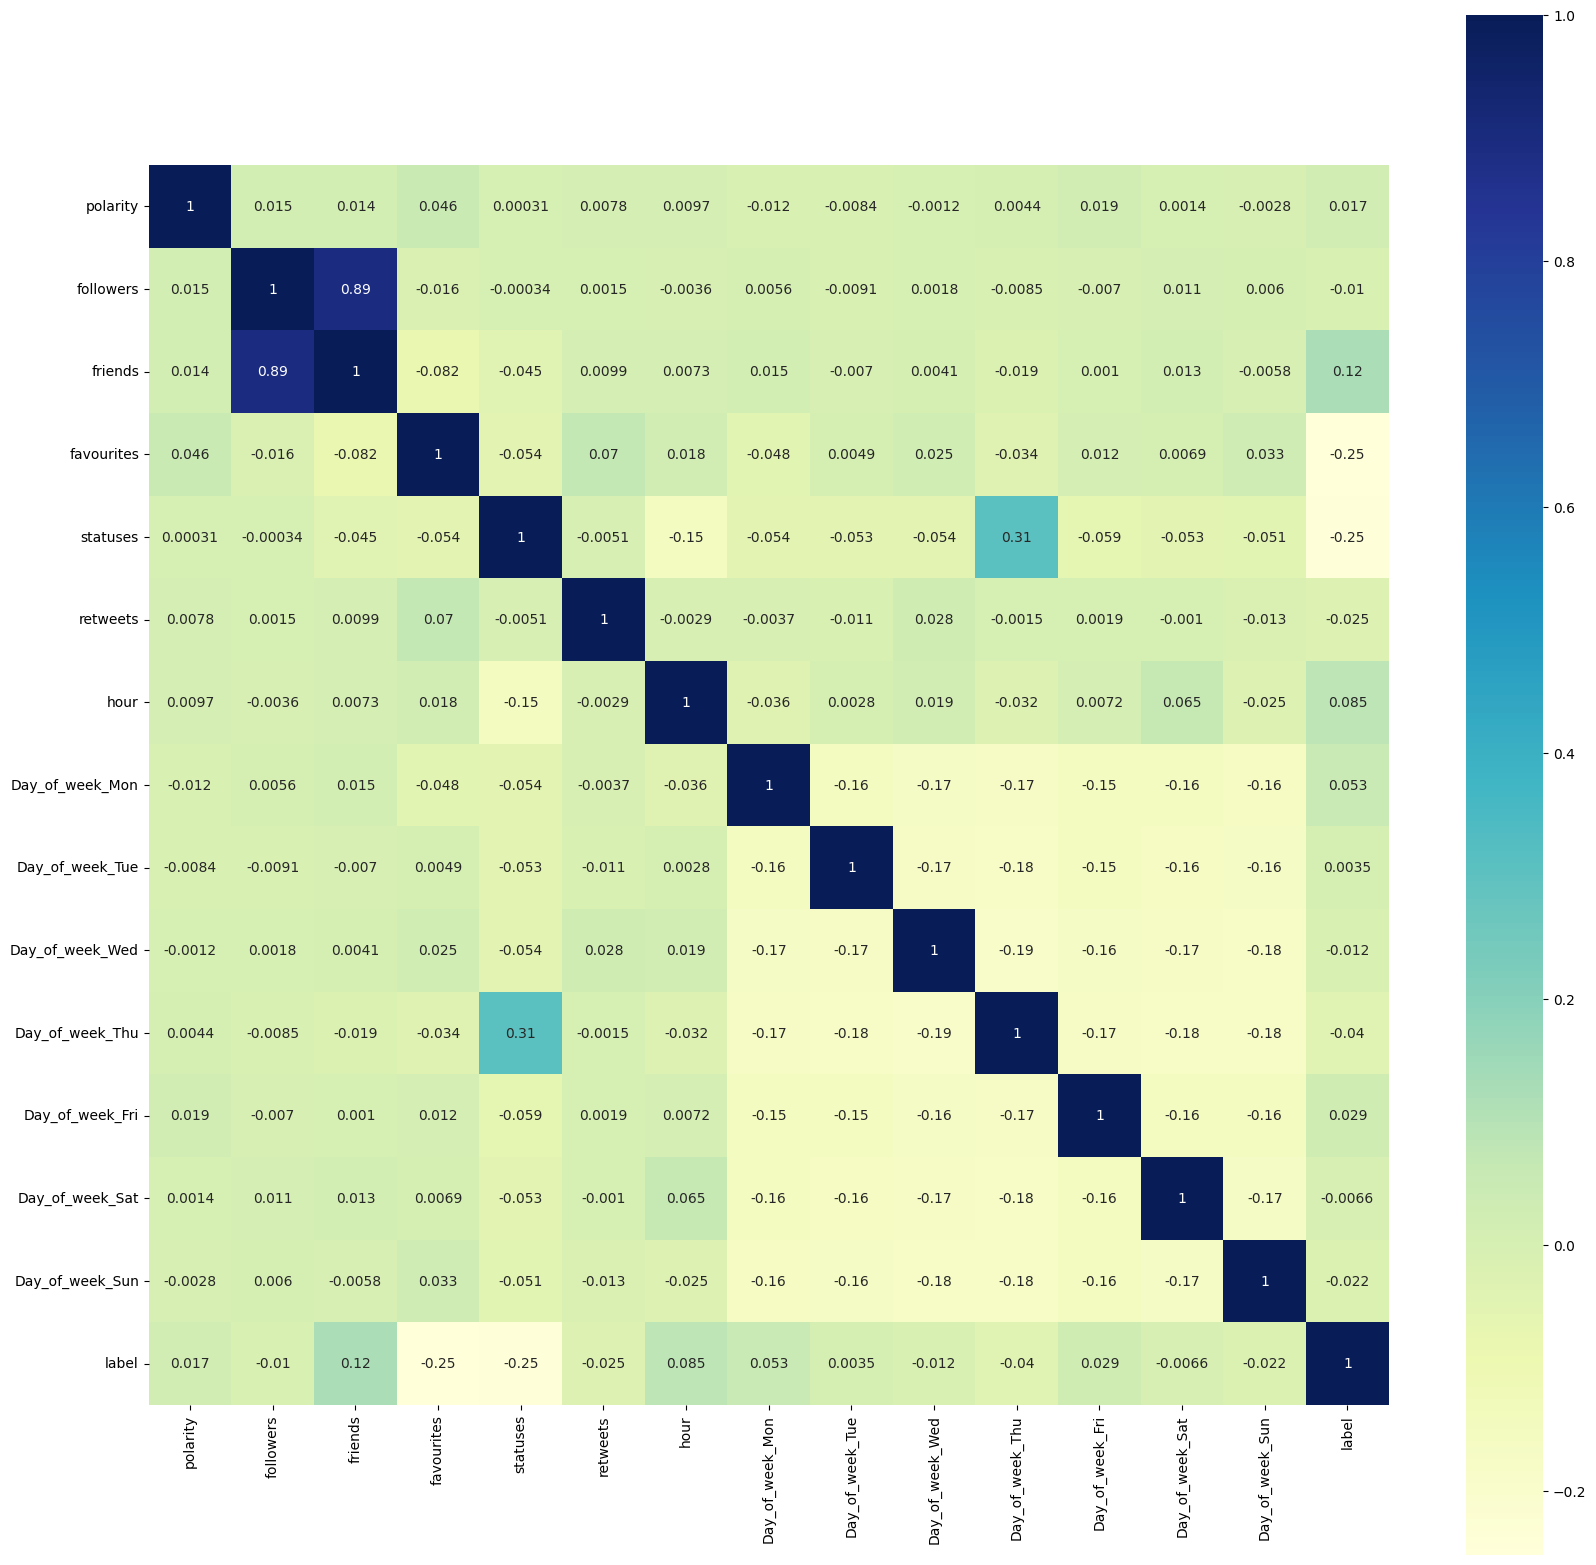

In [17]:
df.hour = df.hour.astype(int)
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="YlGnBu",
            square=True, ax=ax,annot=True)

In [18]:
depressed=df[df['label']==1]
depressed

,polarity,followers,friends,favourites,statuses,retweets,hour,Day_of_week_Mon,Day_of_week_Tue,Day_of_week_Wed,Day_of_week_Thu,Day_of_week_Fri,Day_of_week_Sat,Day_of_week_Sun,label
0,0.100000,84,211,251,837,0,7,0,0,0,0,0,0,1,1
1,-0.093750,84,211,251,837,1,7,0,0,0,0,0,0,1,1
2,-0.400000,84,211,251,837,0,22,0,0,0,0,0,1,0,1
3,1.000000,84,211,251,837,2,18,0,0,0,0,0,1,0,1
4,-0.045833,84,211,251,837,1,18,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,0.850000,78,175,664,1148,217,0,0,1,0,0,0,0,0,1
9940,0.000000,78,175,664,1148,0,20,1,0,0,0,0,0,0,1
9941,0.000000,78,175,664,1148,0,20,1,0,0,0,0,0,0,1
9942,0.118182,78,175,664,1148,0,1,0,0,0,0,0,0,1,1


In [19]:
non_depressed=df[df['label']==0]
non_depressed

,polarity,followers,friends,favourites,statuses,retweets,hour,Day_of_week_Mon,Day_of_week_Tue,Day_of_week_Wed,Day_of_week_Thu,Day_of_week_Fri,Day_of_week_Sat,Day_of_week_Sun,label
9944,0.000000,123,145,1068,23801,0,8,0,0,0,1,0,0,0,0
9945,-0.700000,123,145,1068,23801,0,17,1,0,0,0,0,0,0,0
9946,0.000000,123,145,1068,23801,0,9,0,0,0,0,0,0,1,0
9947,0.000000,123,145,1068,23801,0,12,0,0,0,0,1,0,0,0
9948,0.800000,123,145,1068,23801,0,11,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,0.000000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19879,-0.475000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19880,0.000000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0
19881,0.500000,442,230,7,1063601,0,0,0,0,0,1,0,0,0,0


### Followers Distribution

Text(0.5, 1.0, 'Followers Distribution')

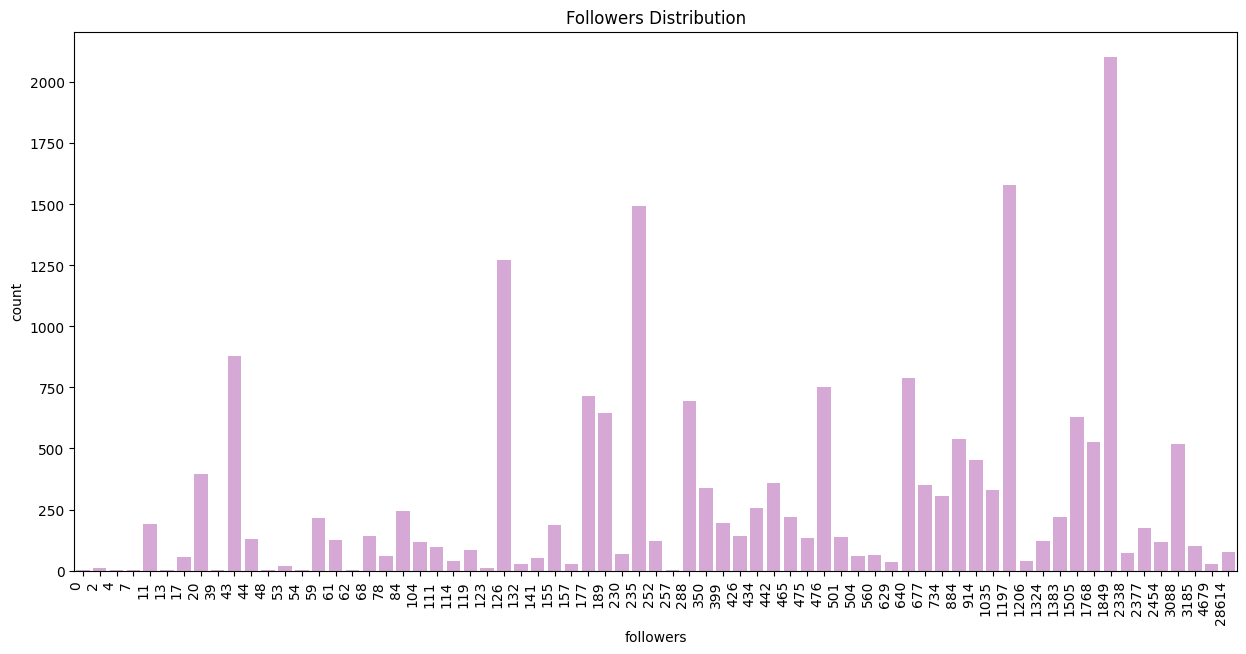

In [20]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=df, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Followers Distribution')

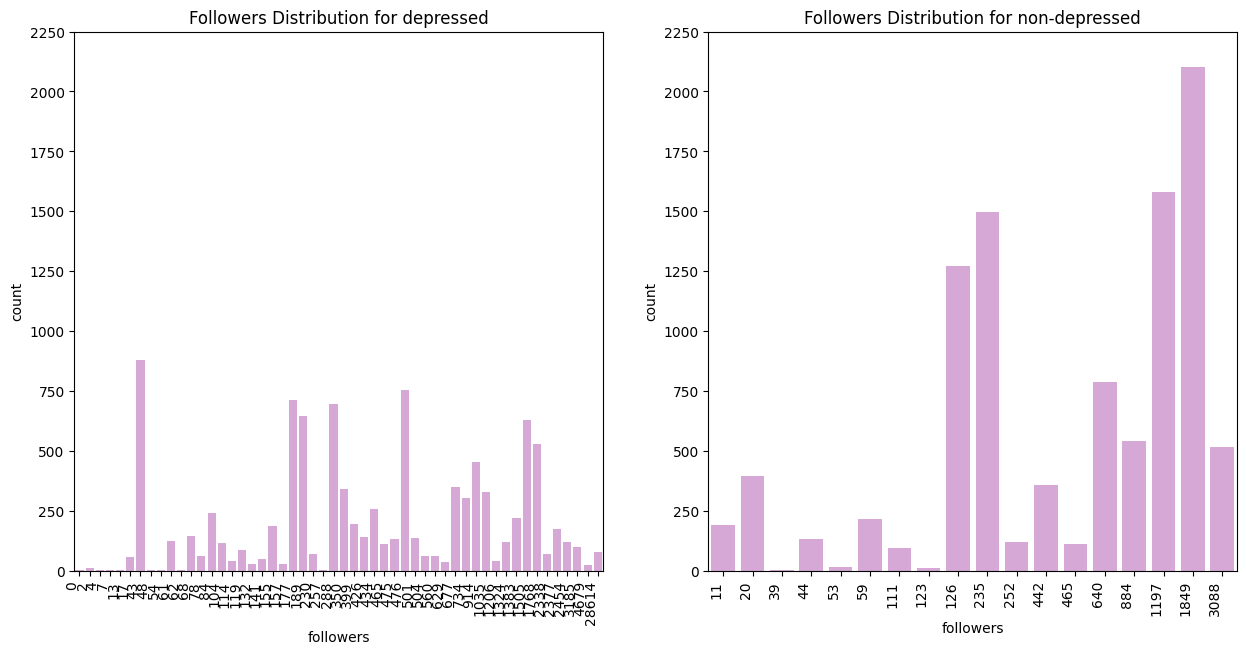

In [21]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=depressed, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Followers Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=non_depressed, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Followers Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: followers vs. label')

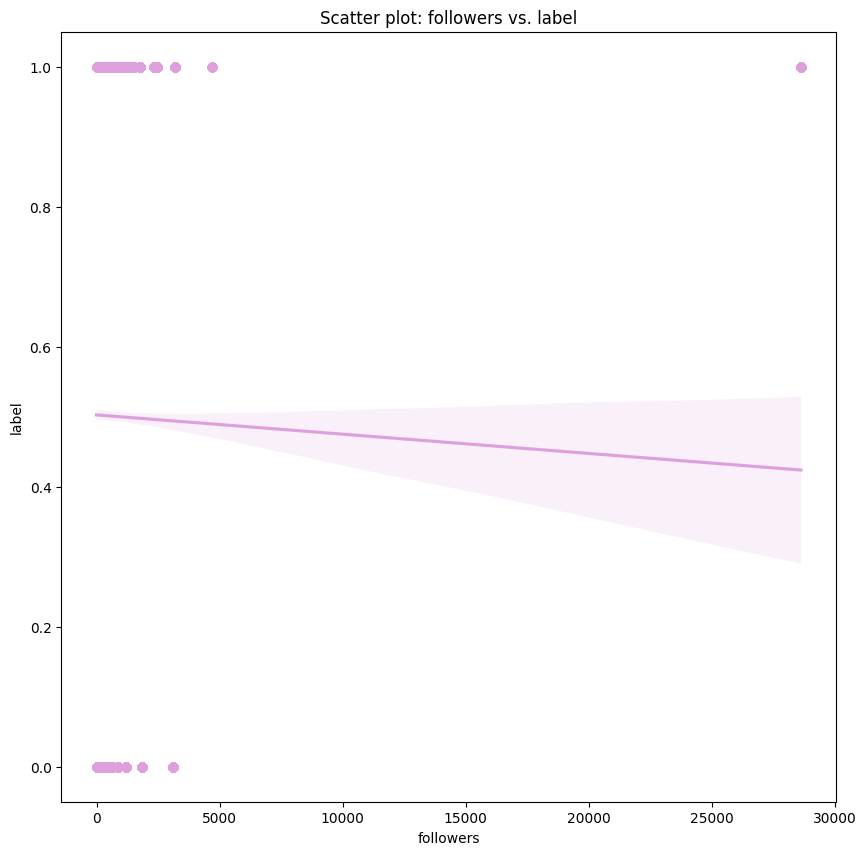

In [22]:
plt.figure(figsize = (10, 10))
sns.regplot(x="followers", y="label", data=df, color = "plum")
plt.xlabel("followers")
plt.ylabel("label")
plt.title("Scatter plot: followers vs. label")

### Friends Distribution

Text(0.5, 1.0, 'Friends Distribution')

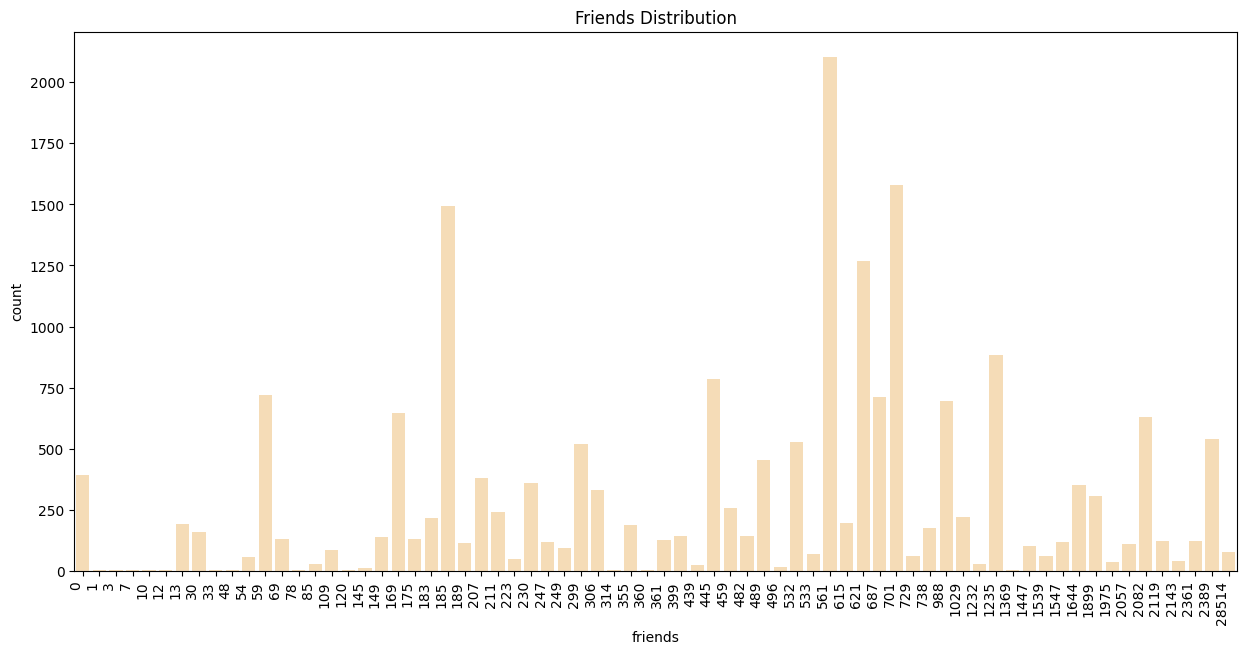

In [23]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=df, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Friends Distribution')

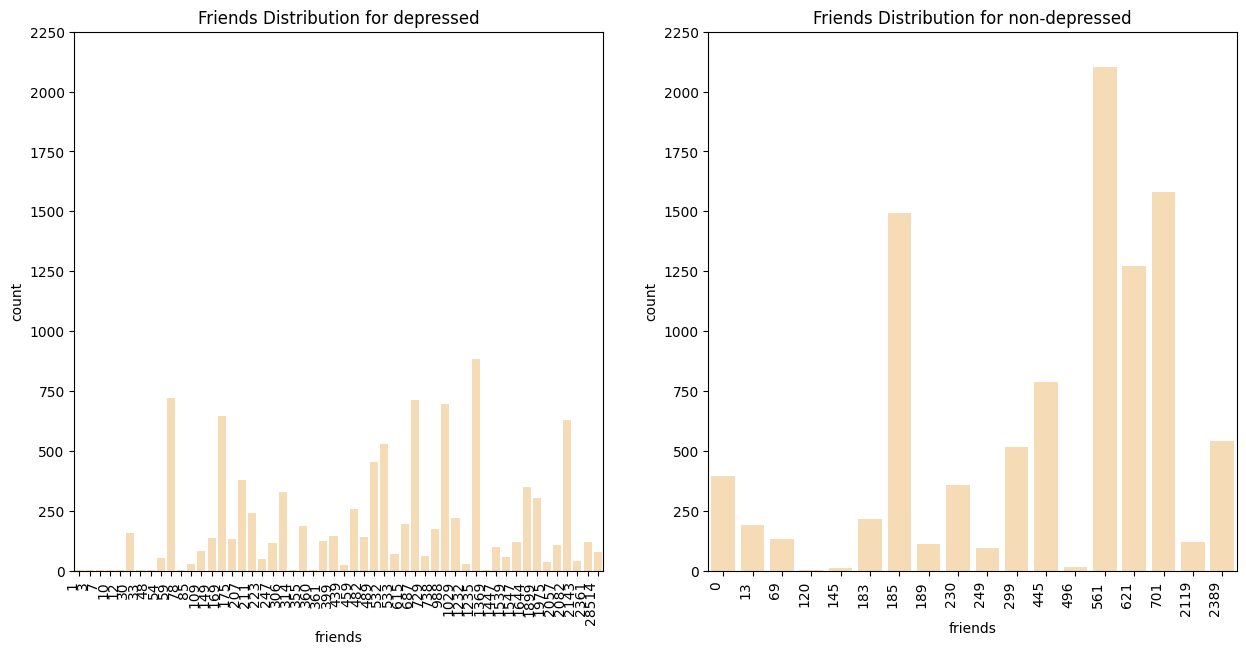

In [24]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=depressed, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Friends Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=non_depressed, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Friends Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: friends vs. label')

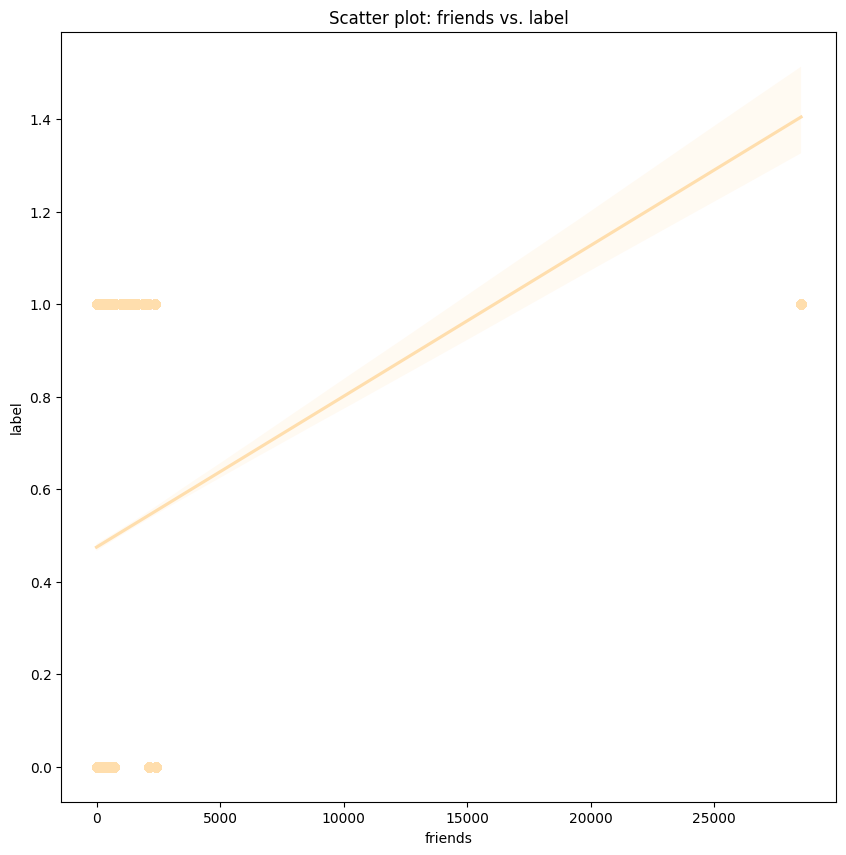

In [25]:
plt.figure(figsize = (10, 10))
sns.regplot(x="friends", y="label", data=df, color = "navajowhite")
plt.xlabel("friends")
plt.ylabel("label")
plt.title("Scatter plot: friends vs. label")

### Favourites Distribution

Text(0.5, 1.0, 'Favourites Distribution')

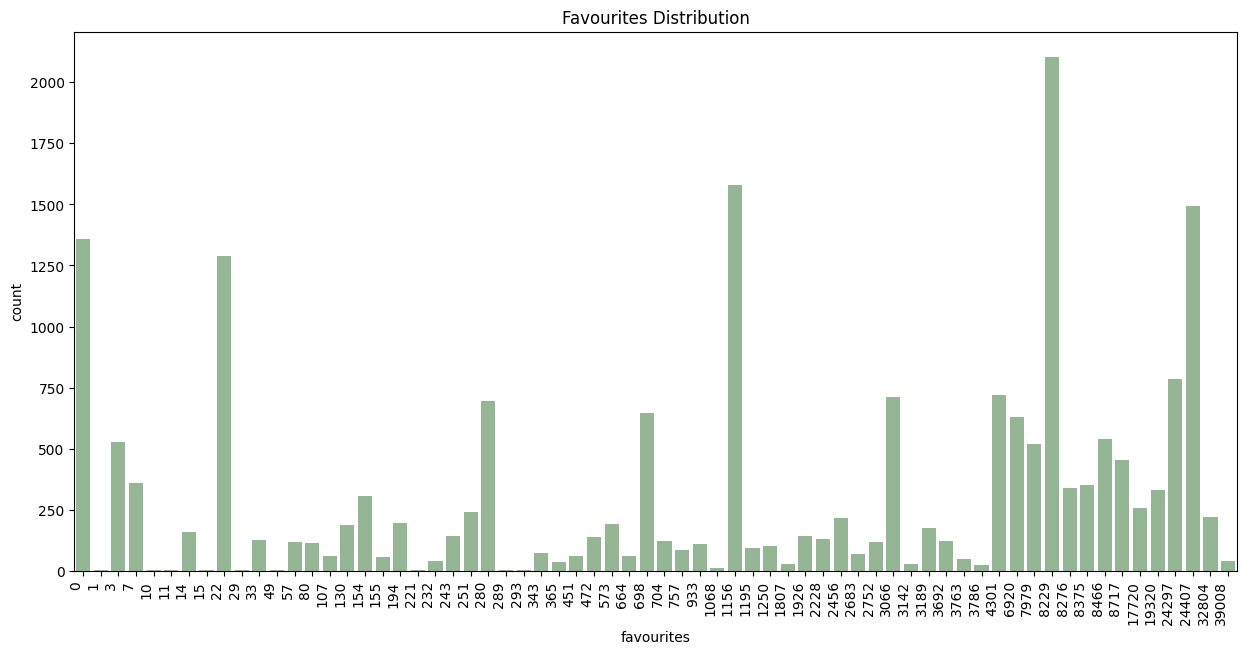

In [26]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=df, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Favourites Distribution')

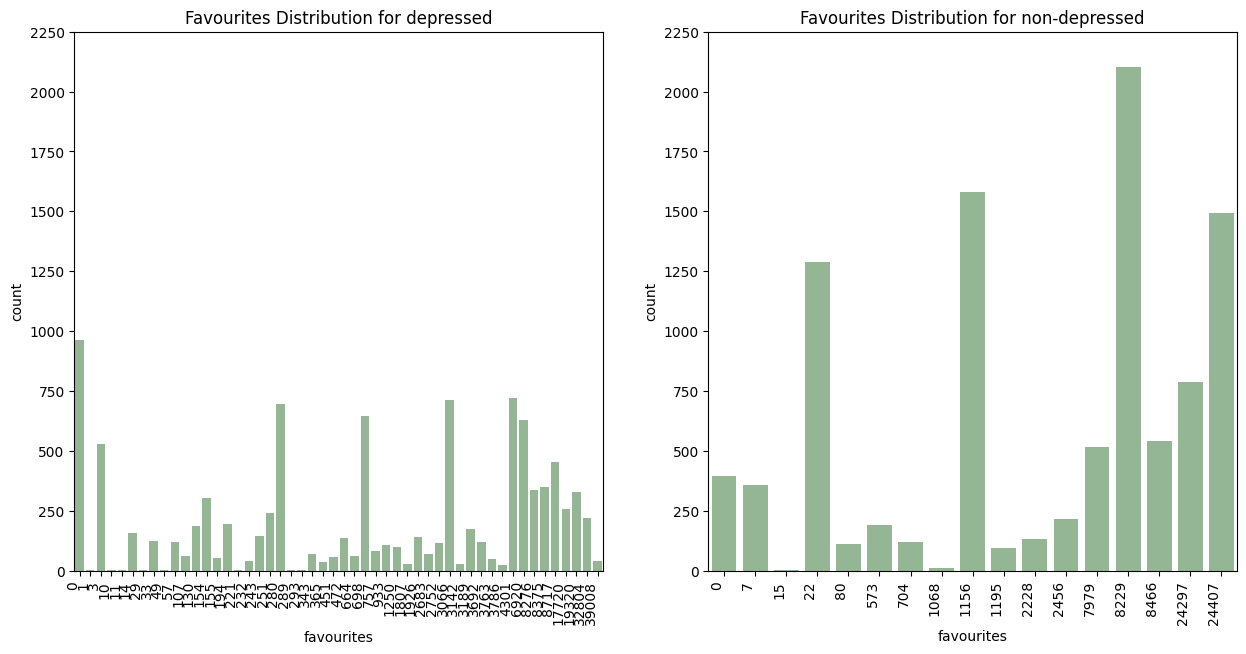

In [27]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=depressed, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Favourites Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=non_depressed, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Favourites Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: favourites vs. label')

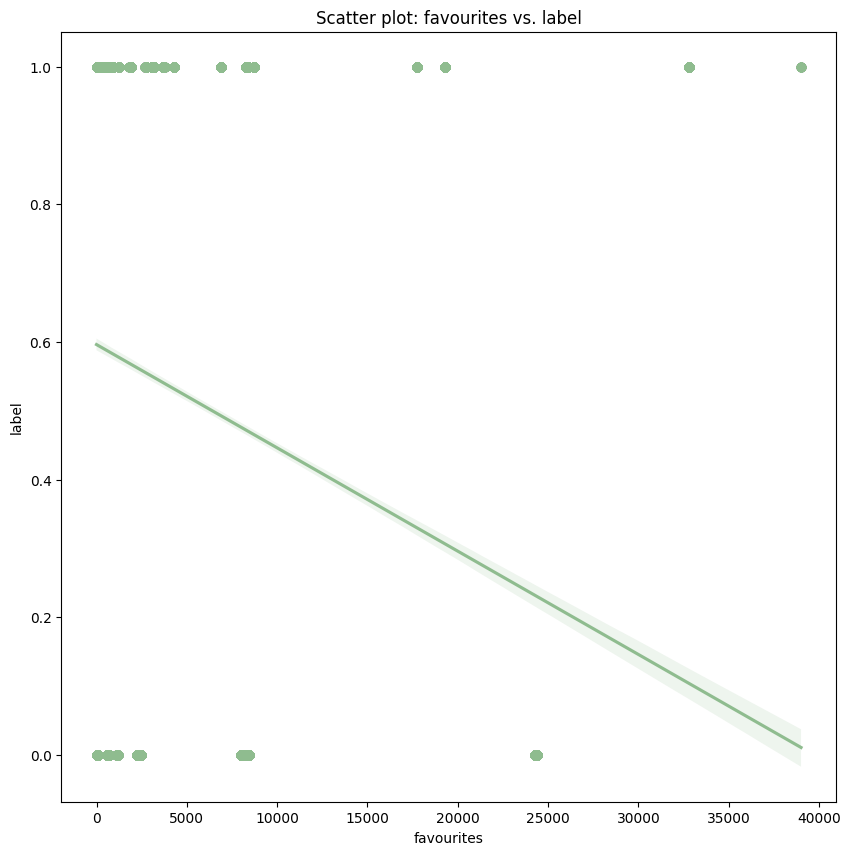

In [28]:
plt.figure(figsize = (10, 10))
sns.regplot(x="favourites", y="label", data=df, color = "darkseagreen")
plt.xlabel("favourites")
plt.ylabel("label")
plt.title("Scatter plot: favourites vs. label")

### Statuses Distribution

Text(0.5, 1.0, 'Statuses Distribution')

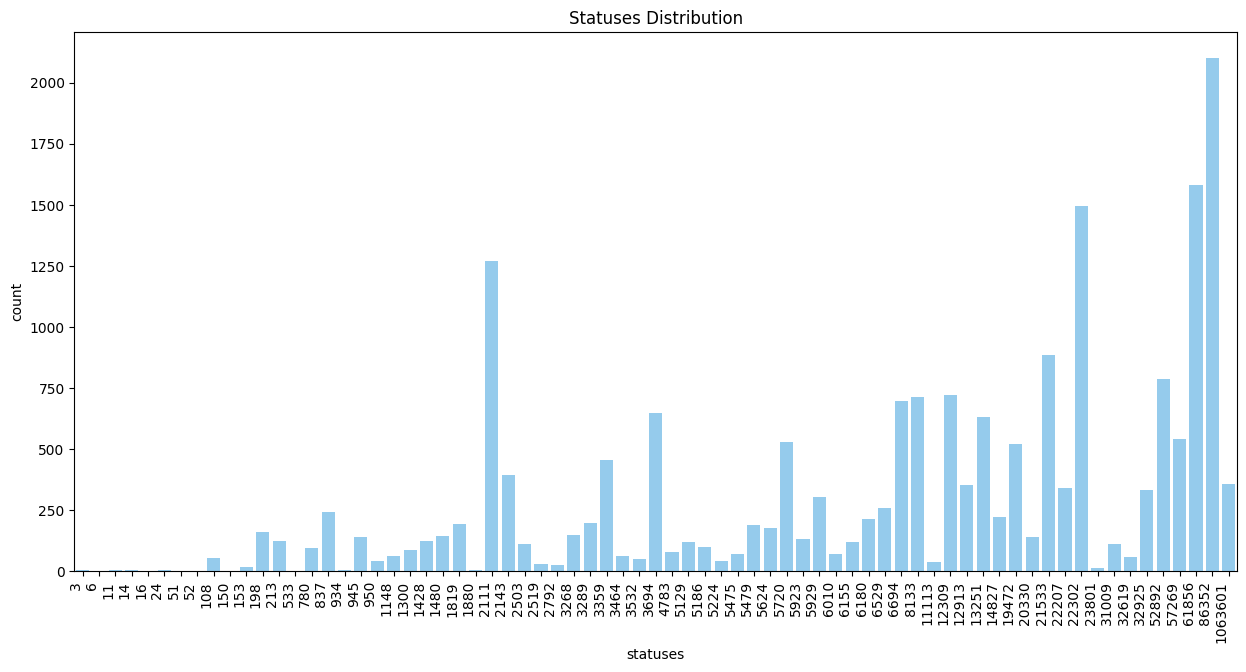

In [29]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=df, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Statuses Distribution')

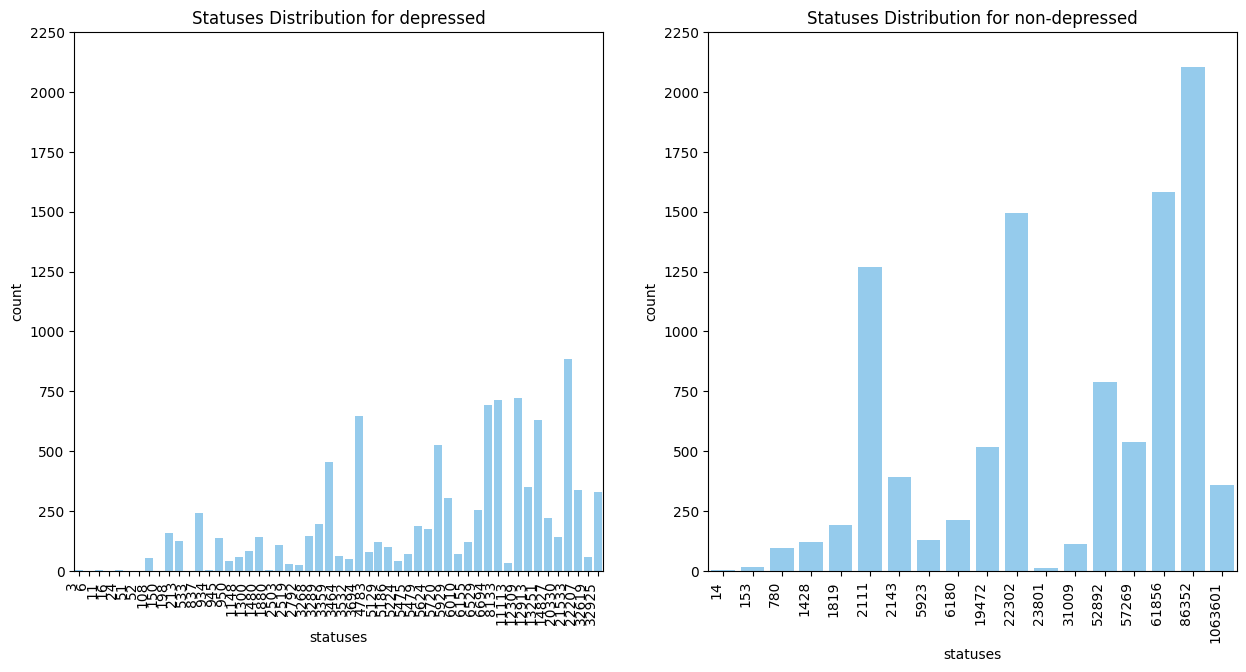

In [30]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=depressed, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Statuses Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=non_depressed, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,250,500,750,1000,1250,1500,1750,2000,2250])
ratings_plot 
plt.title('Statuses Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: statuses vs. label')

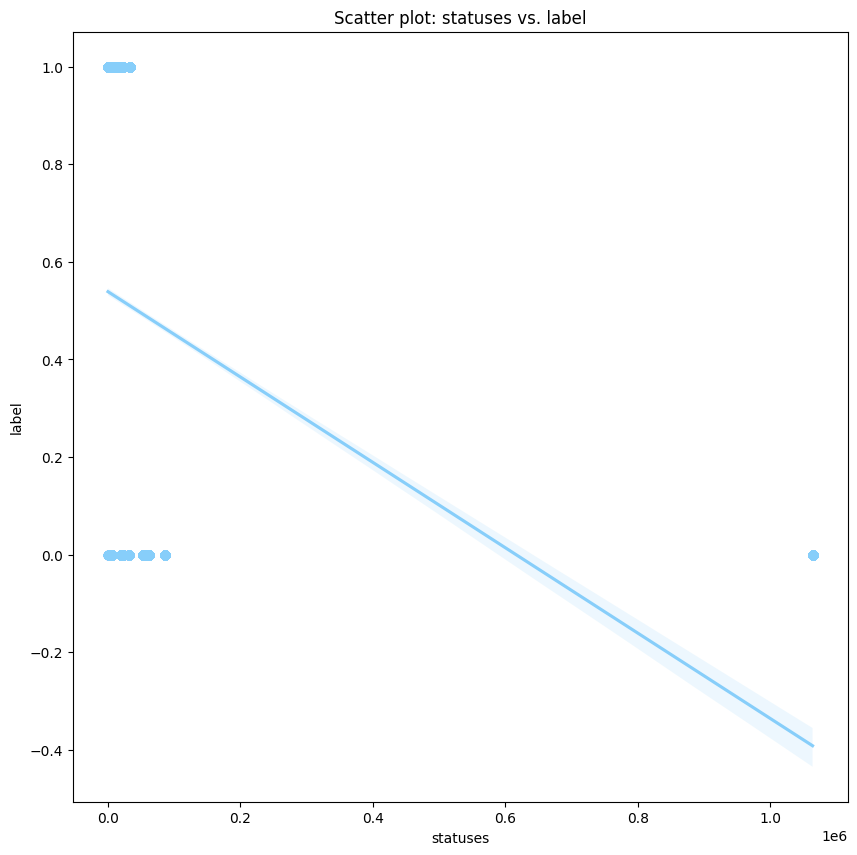

In [31]:
plt.figure(figsize = (10, 10))
sns.regplot(x="statuses", y="label", data=df, color = "lightskyblue")
plt.xlabel("statuses")
plt.ylabel("label")
plt.title("Scatter plot: statuses vs. label")

### Time Distribution(hour)

Text(0.5, 1.0, 'Time Distribution(hour)')

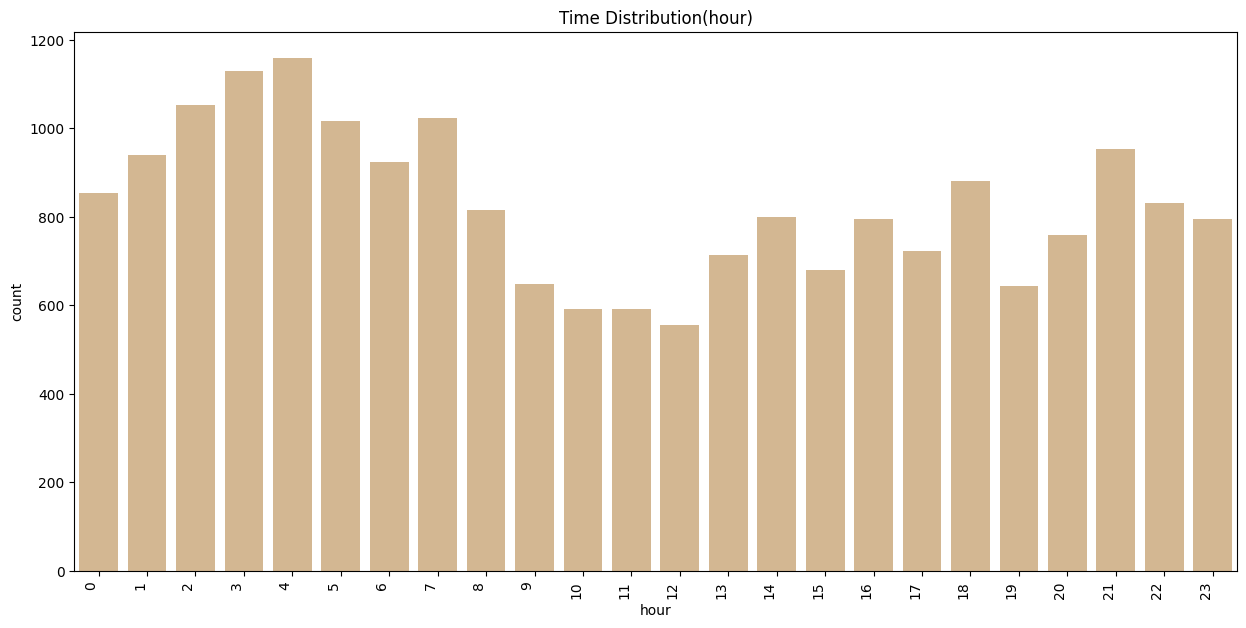

In [32]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="hour",data=df, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Time Distribution(hour)')

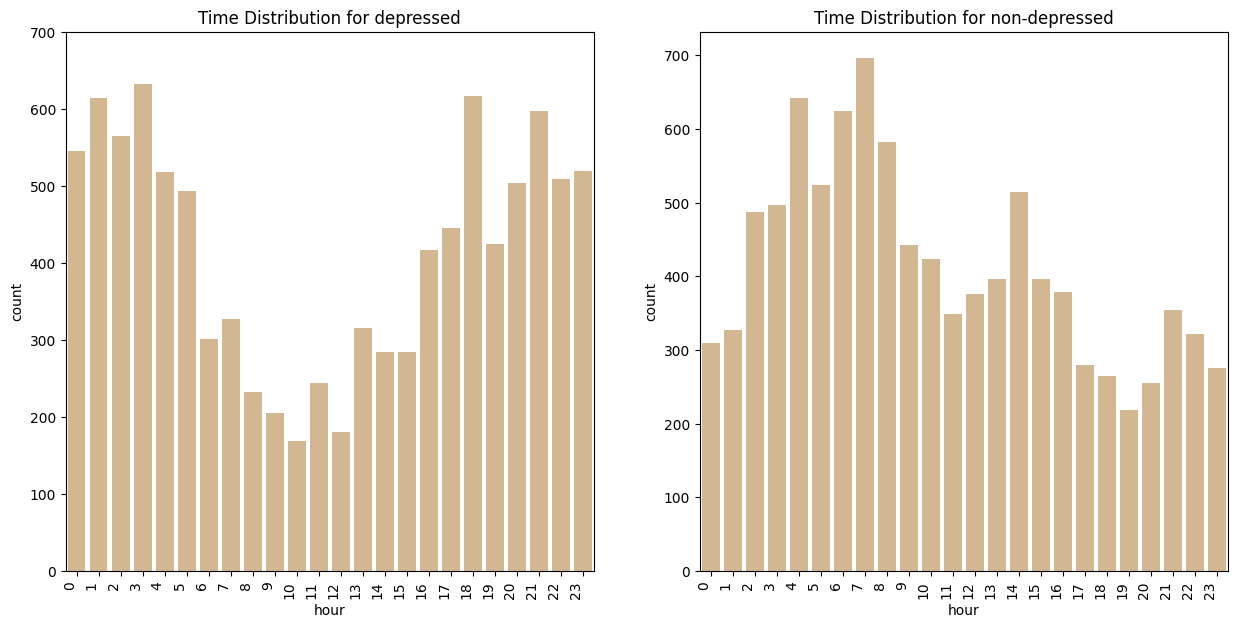

In [33]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="hour",data=depressed, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,100,200,300,400,500,600,700])
ratings_plot 
plt.title('Time Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="hour",data=non_depressed, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,100,200,300,400,500,600,700])
ratings_plot 
plt.title('Time Distribution for non-depressed')

plt.show() 

### Retweets Distribution

In [34]:
retweets=pd.DataFrame(df['retweets'].value_counts())
retweets

,retweets
0,14714
1,1191
2,297
3,183
4,147
...,...
168,1
46281,1
37520,1
773,1


Text(0.5, 1.0, 'Retweets Distribution')

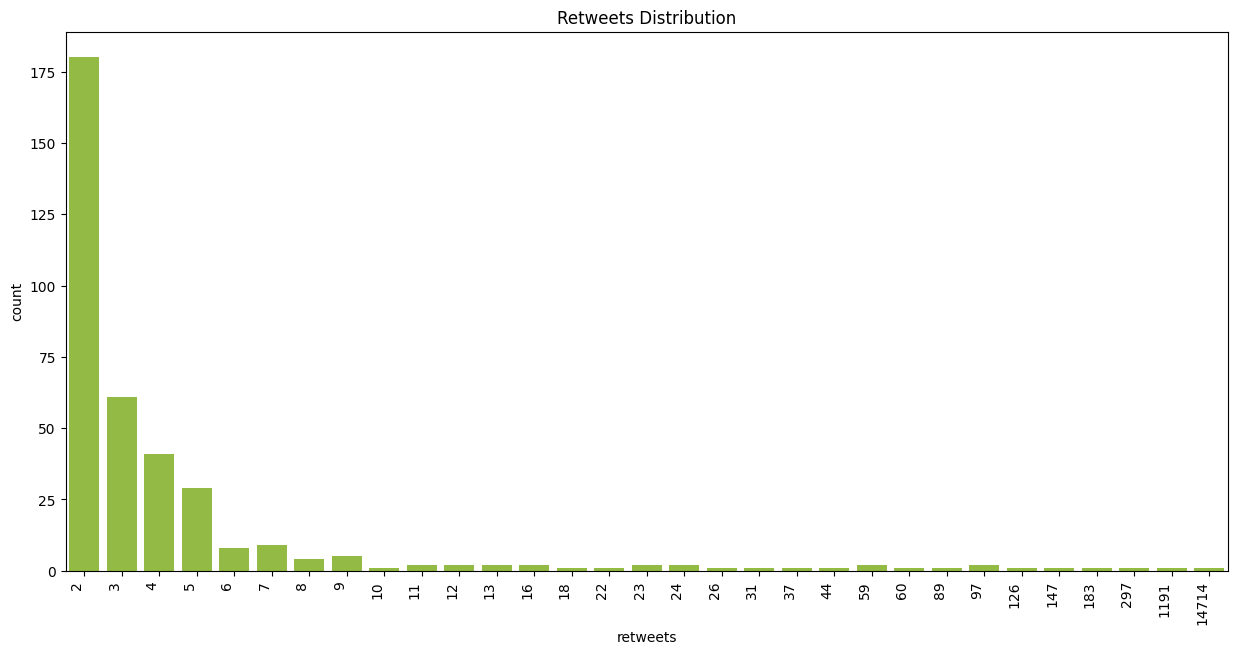

In [35]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="retweets",data=retweets[retweets['retweets']!=1], color="yellowgreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ticks = ax.set_xticks([0,20,40,60]) 
ratings_plot
plt.title('Retweets Distribution')

In [36]:
retweets_depressed=pd.DataFrame(depressed['retweets'].value_counts())
retweets_non_depressed=pd.DataFrame(non_depressed['retweets'].value_counts())

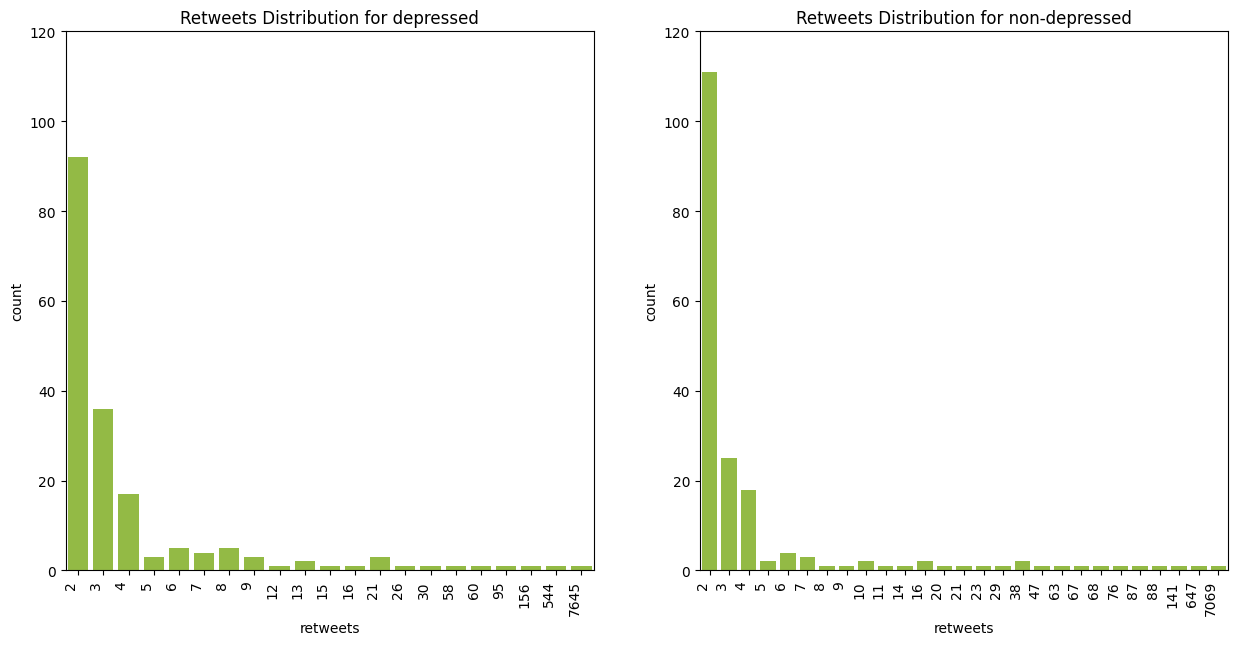

In [37]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="retweets",data=retweets_depressed[retweets_depressed['retweets']!=1], color="yellowgreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
#ticks = ax.set_xticks([0,20,40,60]) 
ratings_plot.set_yticks([0,20,40,60,80,100,120])
ratings_plot
plt.title('Retweets Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="retweets",data=retweets_non_depressed[retweets_non_depressed['retweets']!=1], color="yellowgreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
#ticks = ax.set_xticks([0,20,40,60]) 
ratings_plot.set_yticks([0,20,40,60,80,100,120])
ratings_plot
plt.title('Retweets Distribution for non-depressed')

plt.show() 

Text(0.5, 1.0, 'Scatter plot: retweets vs. label')

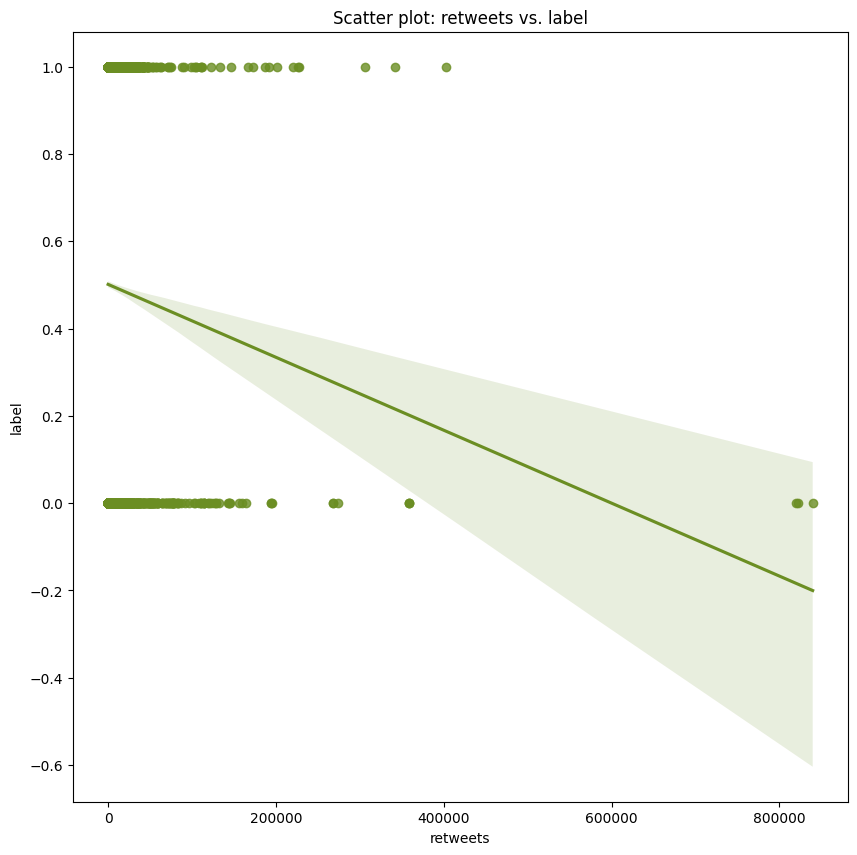

In [38]:
plt.figure(figsize = (10, 10))
sns.regplot(x="retweets", y="label", data=df, color = "olivedrab")
plt.xlabel("retweets")
plt.ylabel("label")
plt.title("Scatter plot: retweets vs. label")

# Modeling

In [39]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

In [40]:
df=df.drop('followers',axis=1)
df_X = df.drop('label',axis=1)
df_y = df.label
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0, shuffle=True)

In [41]:
df_y.value_counts()

1    9944
0    9939
Name: label, dtype: int64

## Logistics Regression

In [42]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(log_reg_pred,y_test))
print('coef:',log_reg_model.coef_)
print('intercept:',log_reg_model.intercept_)

Accuracy of train: 0.8136552244436062
Accuracy of test: 0.8126728689967312
coef: [[ 2.25901998e-04  1.48305235e-03  1.10613502e-06 -7.62098542e-05
  -5.85261463e-06  4.39523559e-02  8.06852809e-04  5.28603425e-04
   4.90028245e-04  5.48793389e-04  4.37313489e-04  2.29618882e-04
   3.76934238e-04]]
intercept: [0.00341814]


In [43]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1987
           1       0.78      0.86      0.82      1990

    accuracy                           0.81      3977
   macro avg       0.82      0.81      0.81      3977
weighted avg       0.82      0.81      0.81      3977



In [44]:
print(confusion_matrix(y_test, log_reg_pred))

[[1511  476]
 [ 269 1721]]


In [45]:
from sklearn.metrics import roc_curve, auc

<Figure size 1500x700 with 0 Axes>

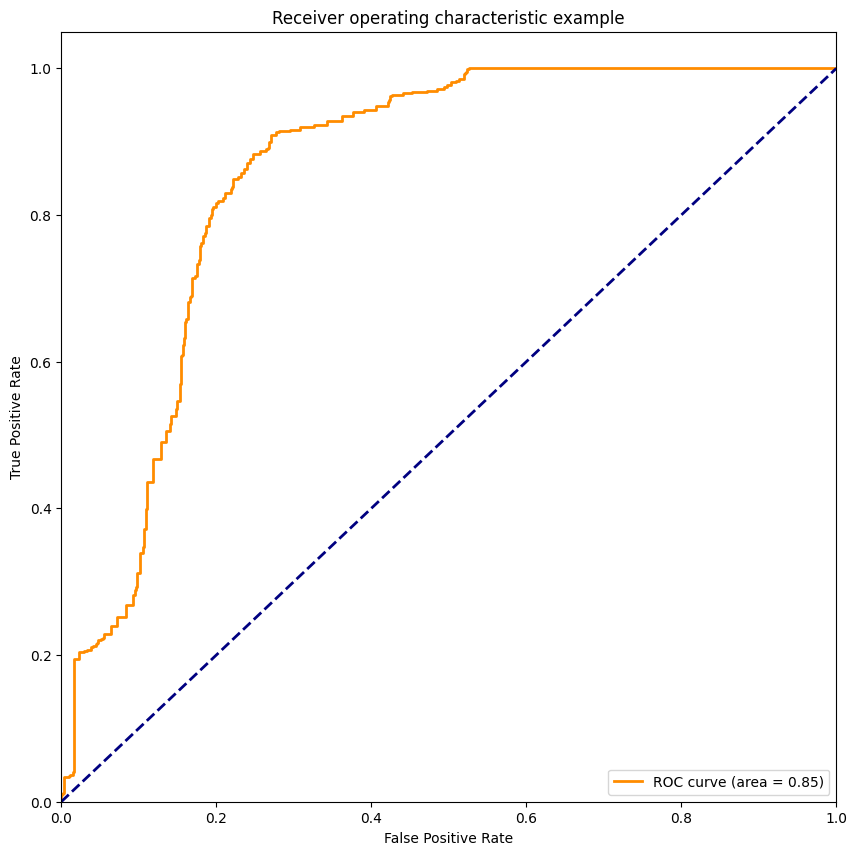

In [46]:
y_score = log_reg_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

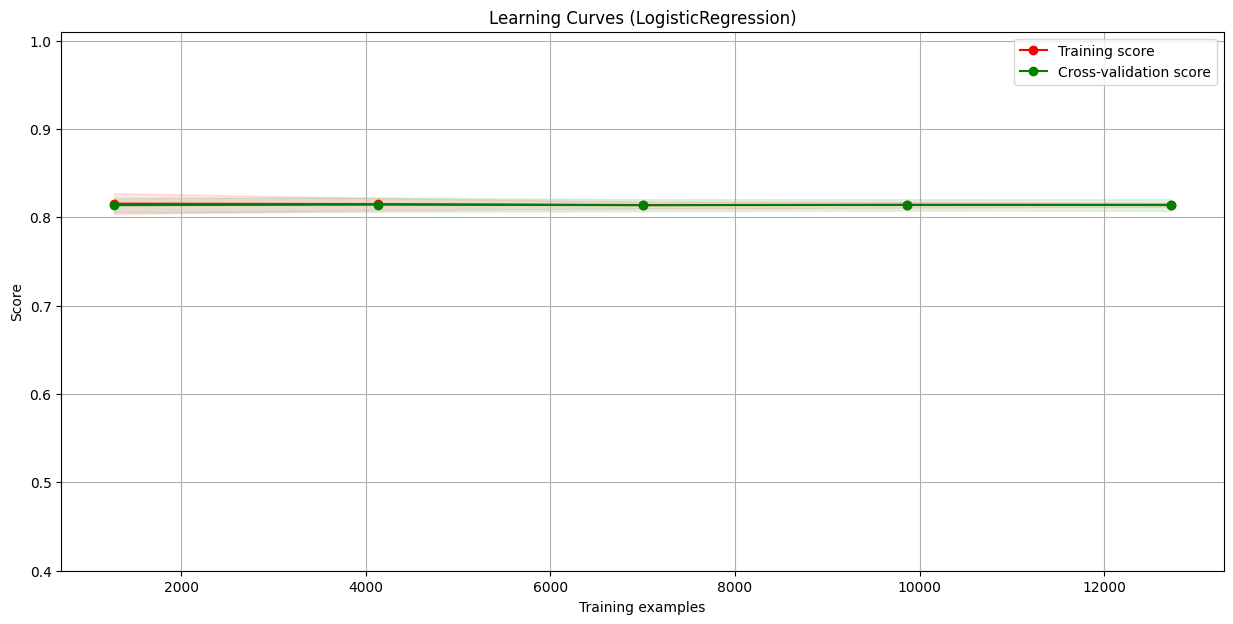

(0.8119336510359598, 0.00910318390354703)

In [47]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(nb_pred,y_test))

Accuracy of train: 0.8199421601911229
Accuracy of test: 0.8056323862207694


In [50]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1987
           1       0.75      0.93      0.83      1990

    accuracy                           0.81      3977
   macro avg       0.83      0.81      0.80      3977
weighted avg       0.83      0.81      0.80      3977



In [51]:
print(confusion_matrix(y_test, nb_pred))

[[1356  631]
 [ 142 1848]]


<Figure size 1500x700 with 0 Axes>

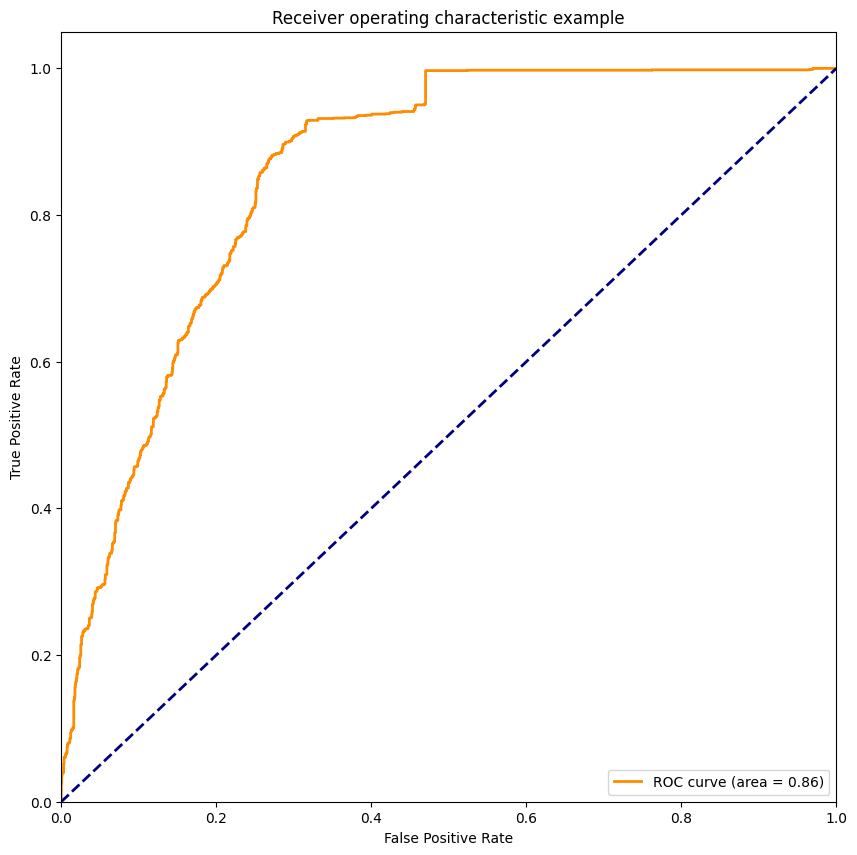

In [52]:
y_score = nb_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

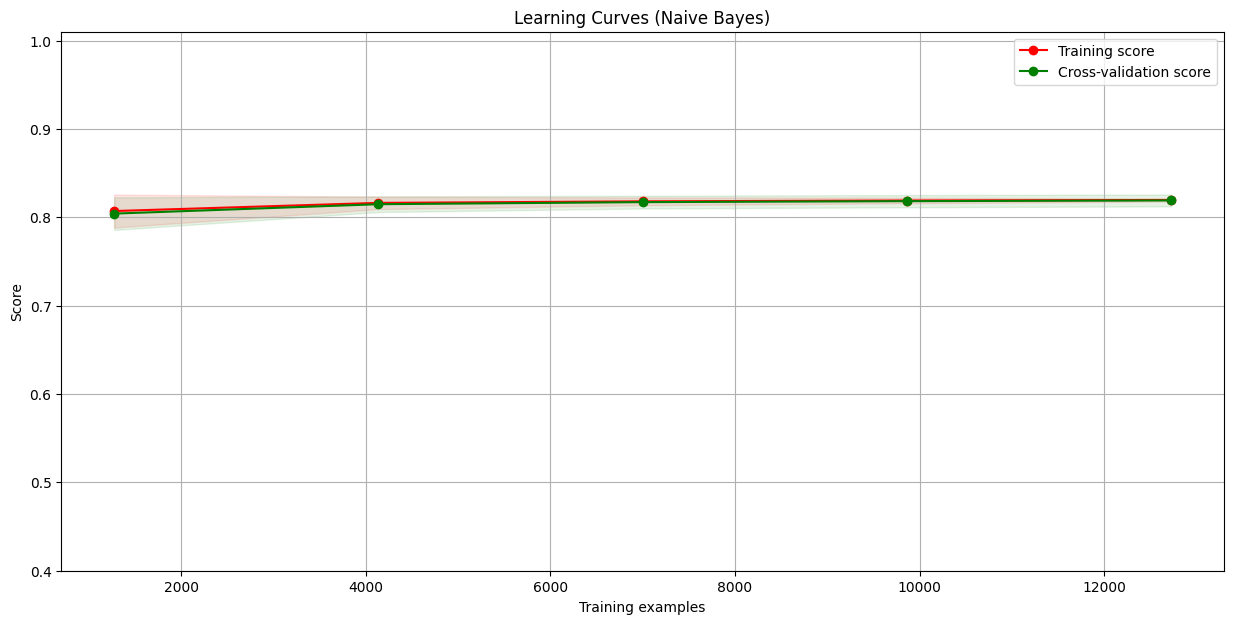

(0.8168316734903798, 0.008981055664317616)

In [53]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## SVM

In [54]:
from sklearn.svm import SVC

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_SVC = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr',probability=True)
SVC_mol=model_SVC.fit(X_train, y_train)

In [55]:
pred_SVC = model_SVC.predict(X_test)
print("Accuracy of train:",model_SVC.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(pred_SVC,y_test))

Accuracy of train: 0.9737834779328556
Accuracy of test: 0.8793060095549409


In [56]:
pred_SVC = SVC_mol.predict(X_test)
print(classification_report(y_test,pred_SVC))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1987
           1       0.83      0.96      0.89      1990

    accuracy                           0.88      3977
   macro avg       0.89      0.88      0.88      3977
weighted avg       0.89      0.88      0.88      3977



In [57]:
print(confusion_matrix(y_test, pred_SVC))

[[1594  393]
 [  87 1903]]


<Figure size 1500x700 with 0 Axes>

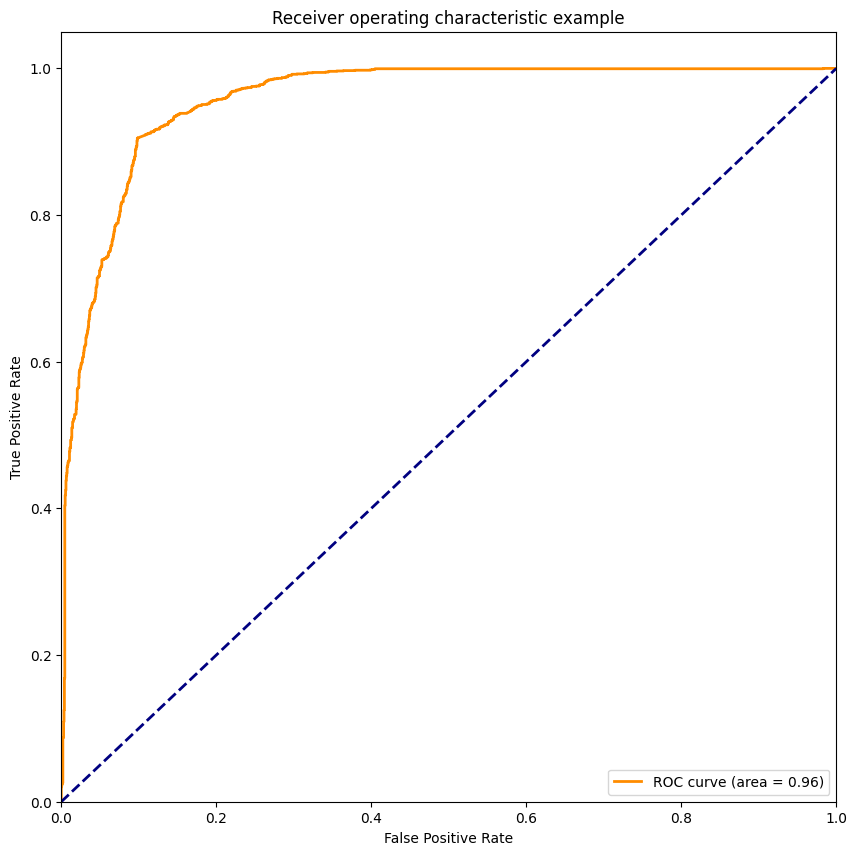

In [58]:
y_score = model_SVC.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

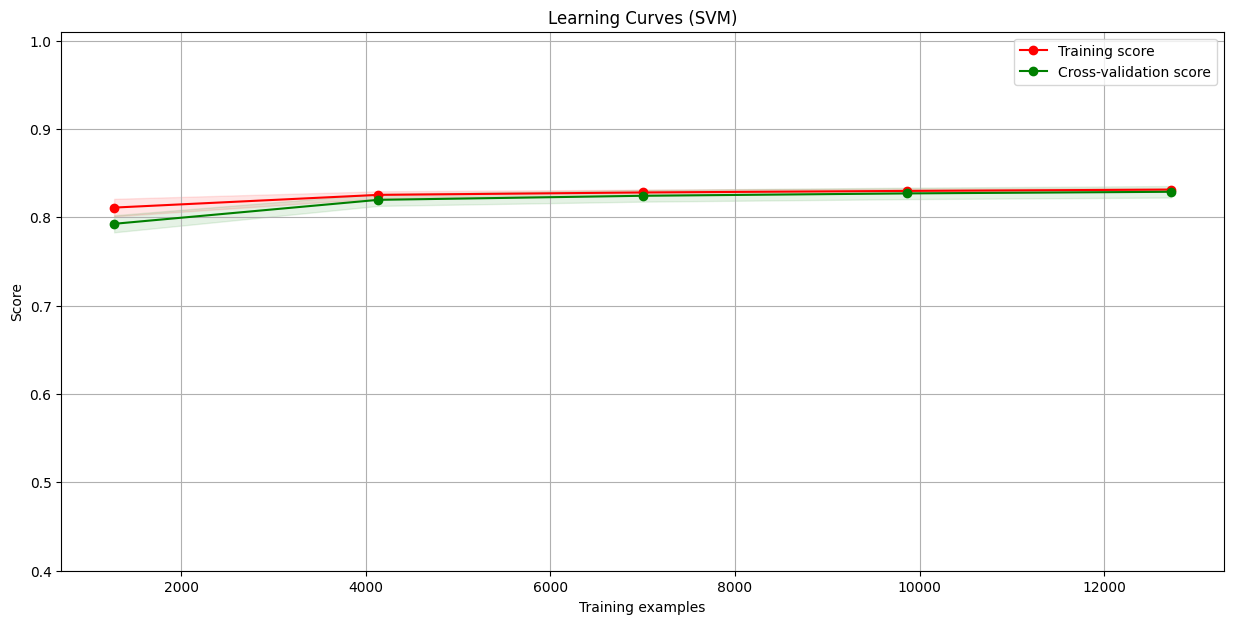

(0.8276357669985369, 0.010572910241399835)

In [59]:
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Decision Tree

In [60]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5769230769230769, 0.875, 'X[3] <= -0.161\ngini = 0.5\nsamples = 15906\nvalue = [7952, 7954]'),
 Text(0.3076923076923077, 0.625, 'X[3] <= -0.299\ngini = 0.358\nsamples = 9962\nvalue = [2326, 7636]'),
 Text(0.15384615384615385, 0.375, 'X[3] <= -0.303\ngini = 0.451\nsamples = 2549\nvalue = [1675, 874]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.285\nsamples = 1051\nvalue = [181, 870]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.005\nsamples = 1498\nvalue = [1494, 4]'),
 Text(0.46153846153846156, 0.375, 'X[1] <= -0.246\ngini = 0.16\nsamples = 7413\nvalue = [651, 6762]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.409\nsamples = 2271\nvalue = [651, 1620]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 5142\nvalue = [0, 5142]'),
 Text(0.8461538461538461, 0.625, 'X[3] <= -0.017\ngini = 0.101\nsamples = 5944\nvalue = [5626, 318]'),
 Text(0.7692307692307693, 0.375, 'X[3] <= -0.094\ngini = 0.315\nsamples = 1621\nvalue = [1303, 318]'),
 Text(0.6923076923076923, 0.125, 'gi

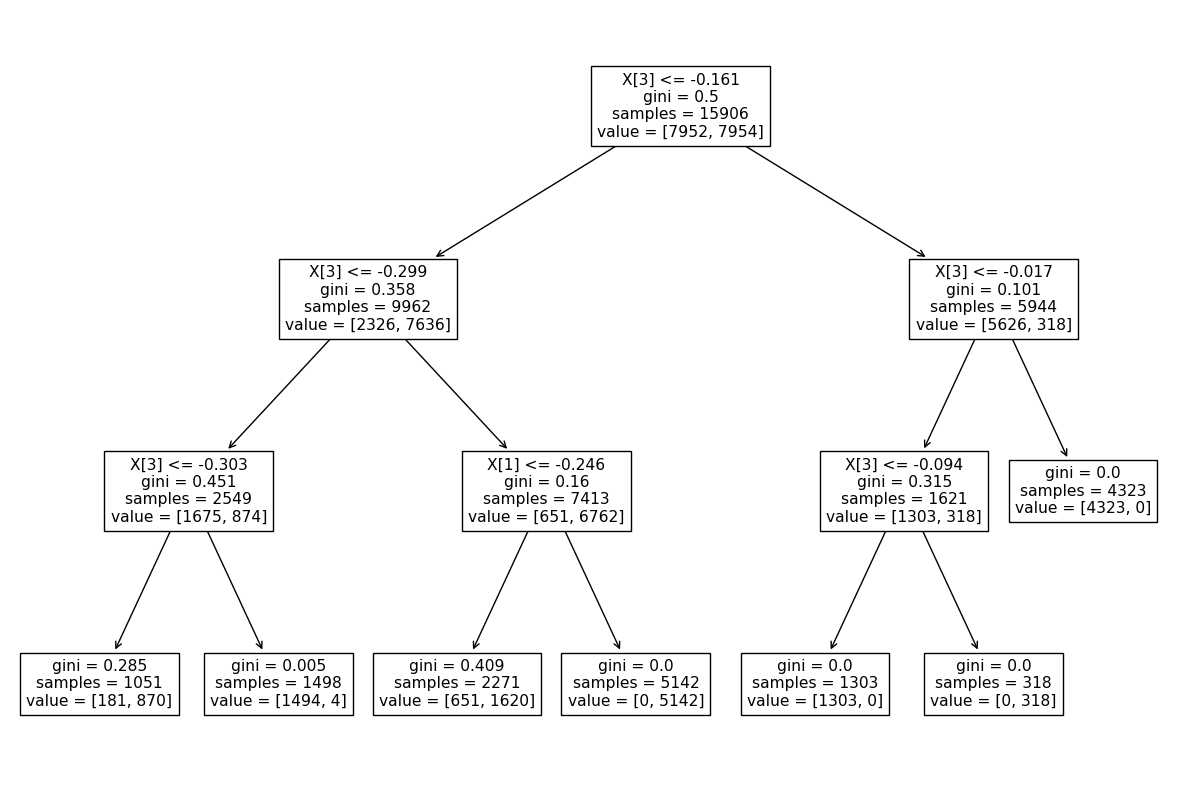

In [61]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt1)

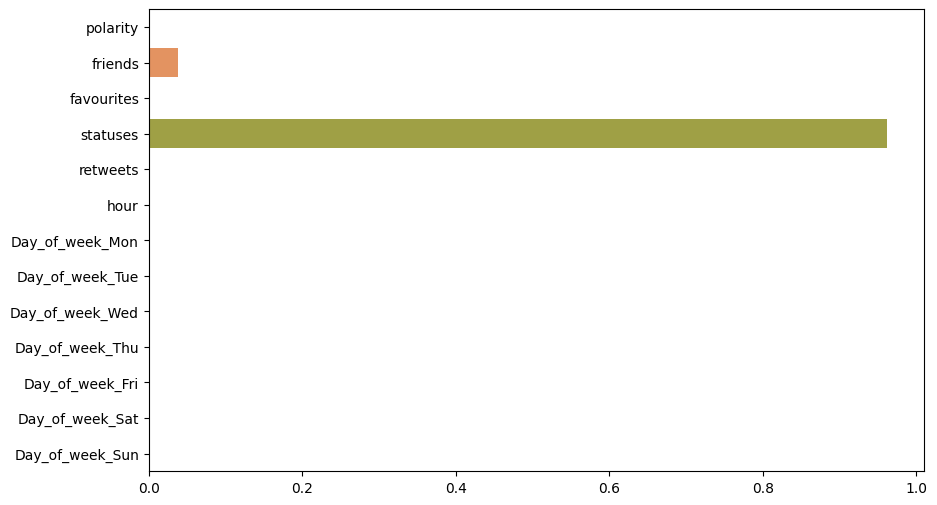

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dt1.feature_importances_, y=df_X.columns)
plt.show()

In [63]:
#predictions
dt_preds = dt1.predict(X_test)
print("Accuracy of train:",dt1.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 0.9474412171507607
Accuracy of test: 0.933115413628363


In [64]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1987
           1       0.88      1.00      0.94      1990

    accuracy                           0.93      3977
   macro avg       0.94      0.93      0.93      3977
weighted avg       0.94      0.93      0.93      3977



In [65]:
print(confusion_matrix(y_test, dt_preds))

[[1721  266]
 [   0 1990]]


<Figure size 1500x700 with 0 Axes>

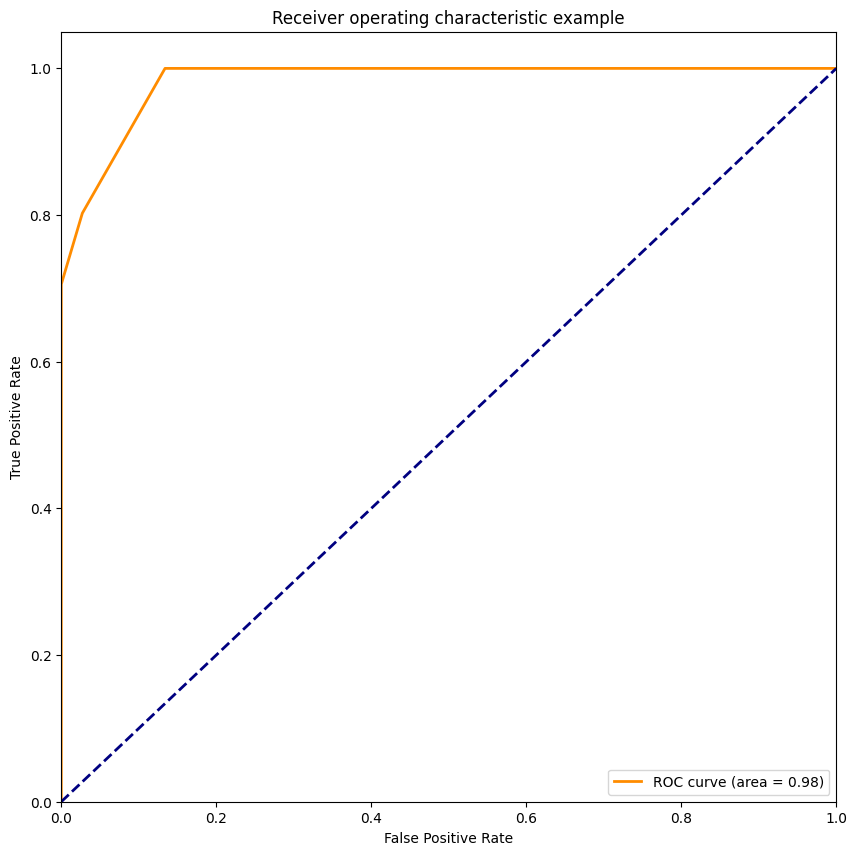

In [66]:
y_score = dt1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

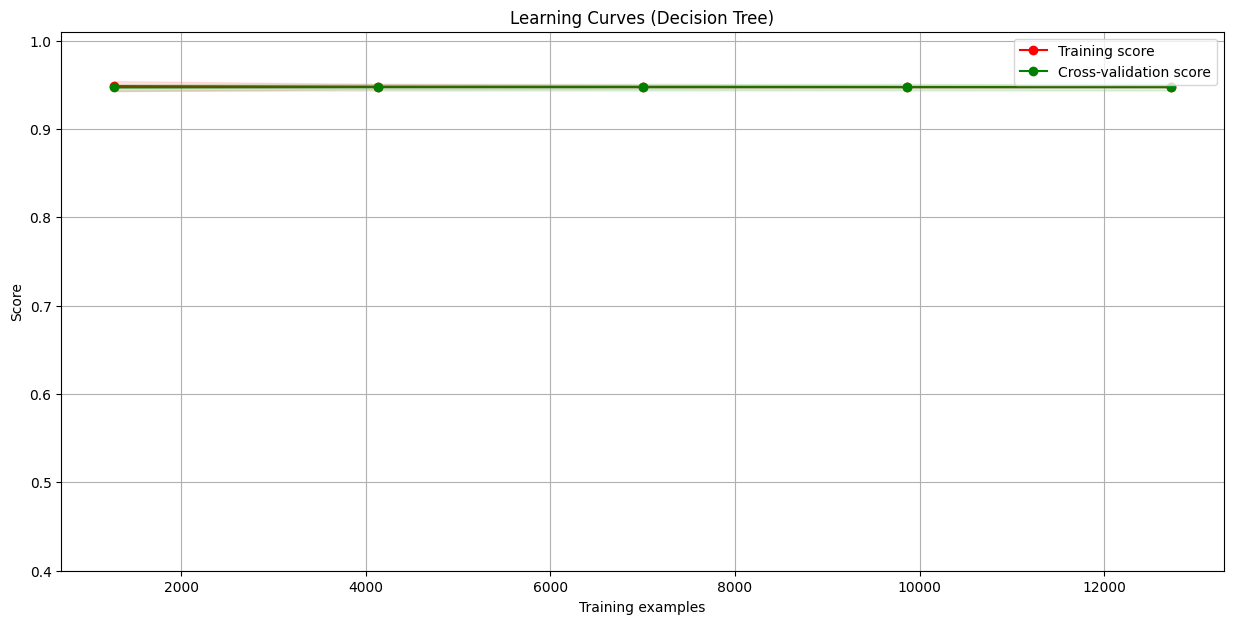

(0.9459604140762978, 0.0049368379170836585)

In [67]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [68]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.7523148148148148, 0.9375, 'X[3] <= -0.161\ngini = 0.5\nsamples = 15906\nvalue = [7952, 7954]'),
 Text(0.5787037037037037, 0.8125, 'X[3] <= -0.299\ngini = 0.358\nsamples = 9962\nvalue = [2326, 7636]'),
 Text(0.4166666666666667, 0.6875, 'X[3] <= -0.303\ngini = 0.451\nsamples = 2549\nvalue = [1675, 874]'),
 Text(0.2777777777777778, 0.5625, 'X[2] <= -0.682\ngini = 0.285\nsamples = 1051\nvalue = [181, 870]'),
 Text(0.18518518518518517, 0.4375, 'X[1] <= -0.181\ngini = 0.04\nsamples = 791\nvalue = [16, 775]'),
 Text(0.1111111111111111, 0.3125, 'X[3] <= -0.315\ngini = 0.005\nsamples = 775\nvalue = [2, 773]'),
 Text(0.07407407407407407, 0.1875, 'X[1] <= -0.376\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.037037037037037035, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.14814814814814814, 0.1875, 'gini = 0.0\nsamples = 768\nvalue = [0, 768]'),
 Text(0.25925925925925924, 0.3125, 'X[3] <= -

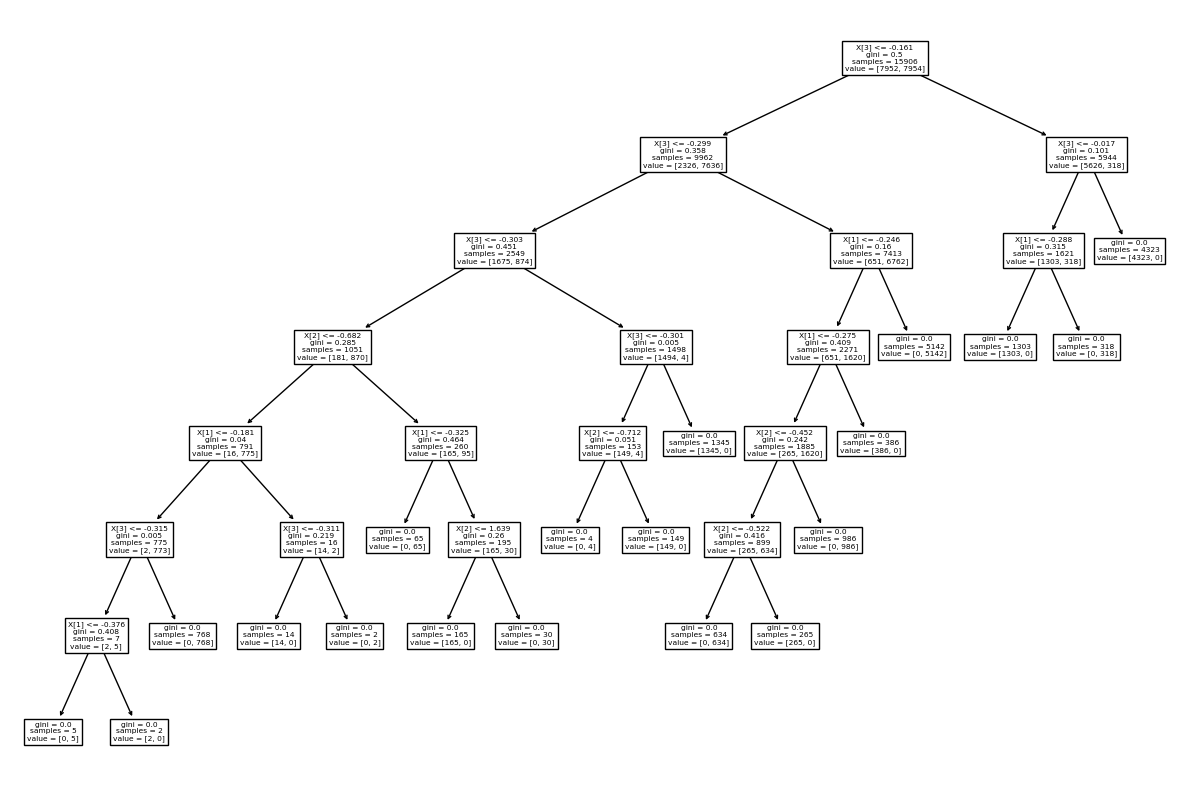

In [69]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)

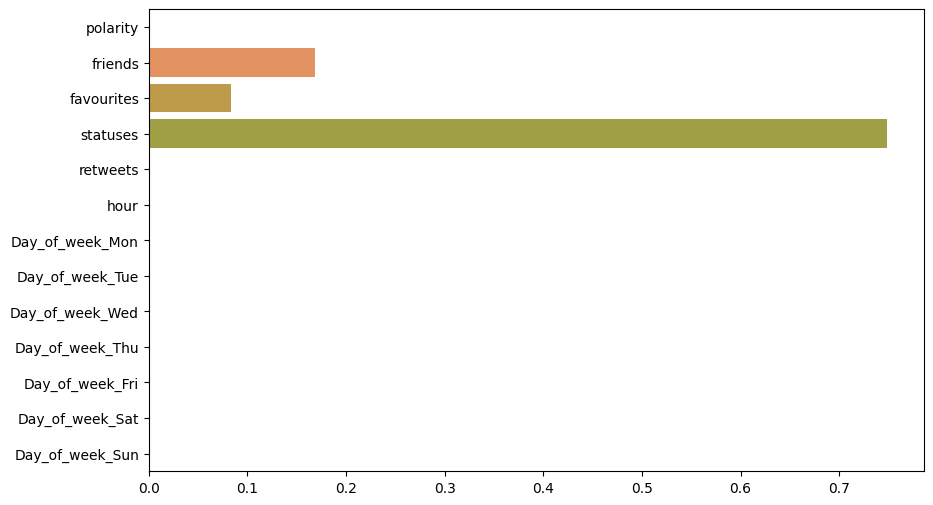

In [70]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=dt.feature_importances_, y=df_X.columns)
plt.show()

In [71]:
#predictions
dt_preds = dt.predict(X_test)
print("Accuracy of train:",dt1.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 0.9474412171507607
Accuracy of test: 1.0


In [72]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      1990

    accuracy                           1.00      3977
   macro avg       1.00      1.00      1.00      3977
weighted avg       1.00      1.00      1.00      3977



In [73]:
print(confusion_matrix(y_test, dt_preds))

[[1987    0]
 [   0 1990]]


<Figure size 1500x700 with 0 Axes>

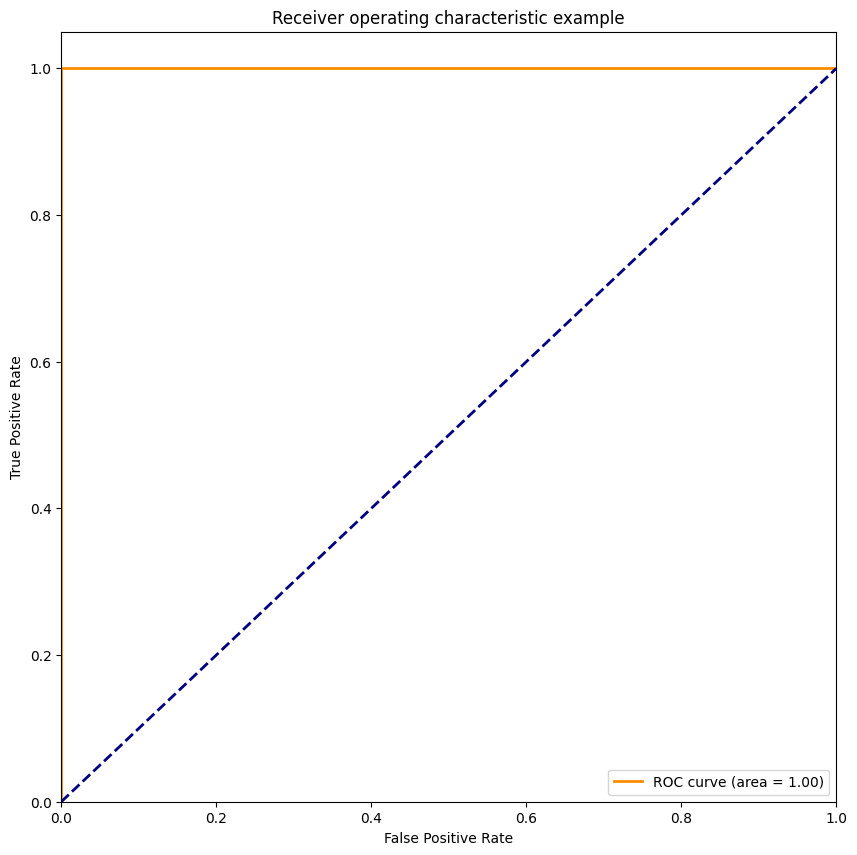

In [74]:
y_score = dt.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

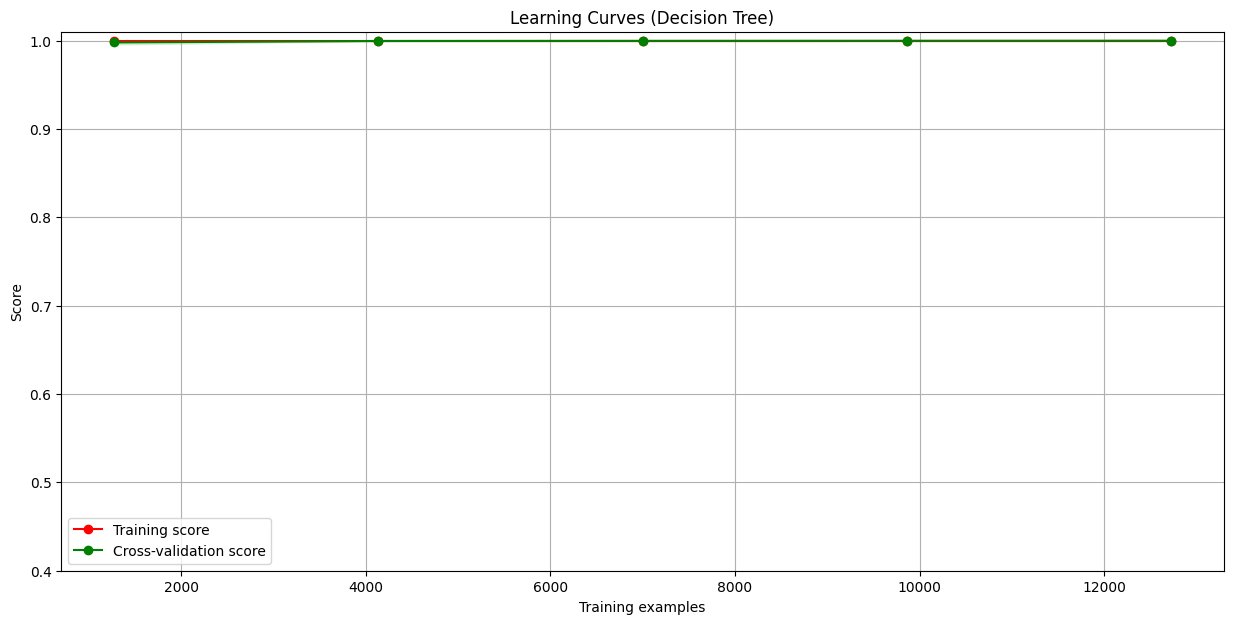

(0.9997715521541486, 0.0004568956917029299)

In [75]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Random Forest

In [76]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
y_train.shape,y_test.shape

((15906,), (3977,))

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=3,random_state=0)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print("Accuracy of train:",rfr.score(X_train,y_train))
print('Accuracy of test: ',rfr.score(x_test, y_test))

Accuracy of train: 0.9009178926191375
Accuracy of test:  0.8991702288156902


In [78]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1987
           1       0.85      0.97      0.91      1990

    accuracy                           0.90      3977
   macro avg       0.91      0.90      0.90      3977
weighted avg       0.91      0.90      0.90      3977



In [79]:
print(confusion_matrix(y_test, gsearch1_preds))

[[1647  340]
 [  61 1929]]


<Figure size 1500x700 with 0 Axes>

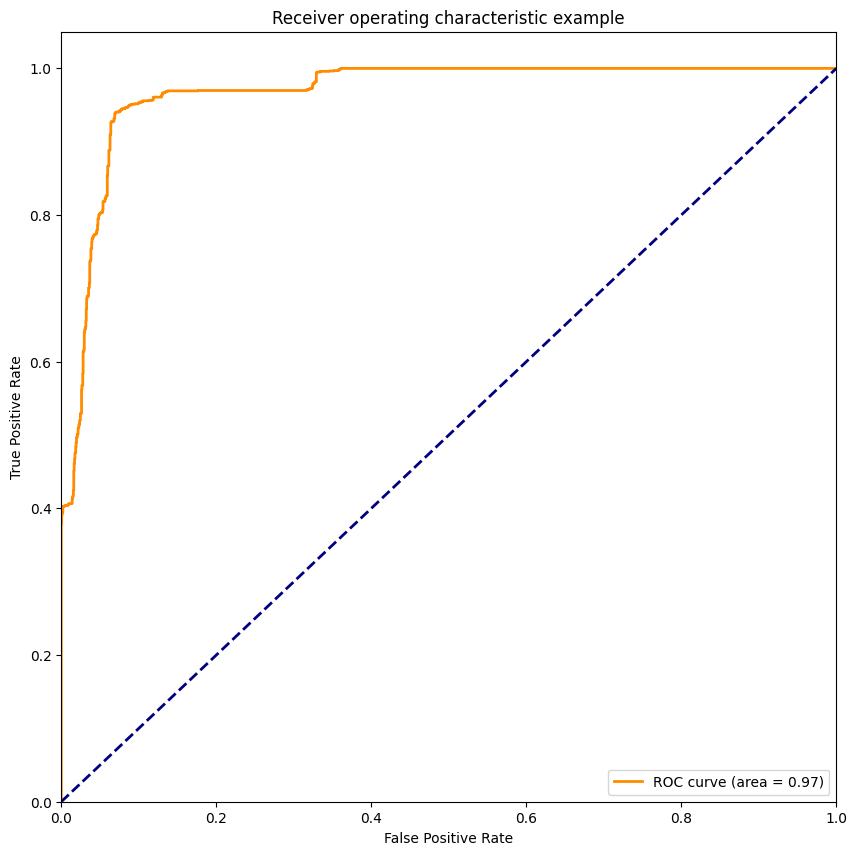

In [80]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

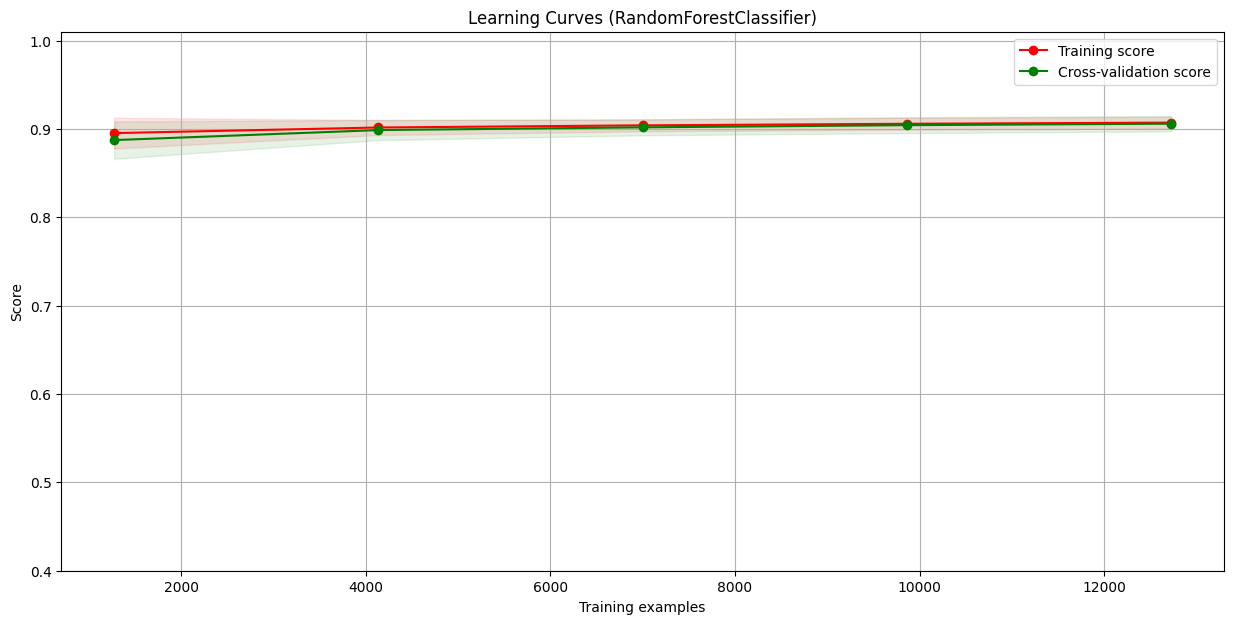

(0.9054347030154504, 0.016453498786919263)

In [81]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=3,random_state=0)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [83]:
param_test1 = {'n_estimators':range(10,101,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_depth=18,max_features='sqrt' ,random_state=0), 
                       param_grid = param_test1,cv=5)
gsearch1.fit(x_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.05605741, 0.11265287, 0.16477294, 0.20740881, 0.25455689,
         0.31535487, 0.41608176, 0.43265567, 0.43478885, 0.47778096]),
  'std_fit_time': array([0.00681034, 0.00743177, 0.00852456, 0.01113939, 0.0138194 ,
         0.02631568, 0.04043179, 0.0294236 , 0.00935568, 0.00566859]),
  'mean_score_time': array([0.00498786, 0.00797396, 0.01215472, 0.01475811, 0.01896214,
         0.02294545, 0.02952719, 0.03289371, 0.03211317, 0.03590221]),
  'std_score_time': array([0.00109215, 0.00089803, 0.00038877, 0.00115956, 0.00064183,
         0.00188226, 0.00300113, 0.00573493, 0.00116364, 0.00209714]),
  'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_e

In [84]:
param_test2 = {'max_depth':range(1,20,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 30),
   param_grid = param_test2,cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.06462431, 0.0774024 , 0.09478693, 0.10137806, 0.11170893,
         0.11437368, 0.11740522, 0.1282753 , 0.14692321, 0.13669844,
         0.13344121, 0.13803873, 0.14361548, 0.13723321, 0.14142685,
         0.13982463, 0.13743482, 0.14162784, 0.14282389]),
  'std_fit_time': array([0.00562963, 0.00399737, 0.00710641, 0.00443124, 0.0041343 ,
         0.00254743, 0.00406394, 0.00836217, 0.00907192, 0.00588045,
         0.00478224, 0.00405753, 0.00975466, 0.00609225, 0.00520254,
         0.00340891, 0.00249101, 0.00315796, 0.0042572 ]),
  'mean_score_time': array([0.00617423, 0.00797486, 0.00877566, 0.00797997, 0.00836558,
         0.00917602, 0.00898376, 0.00936918, 0.01118622, 0.0105711 ,
         0.01076026, 0.01097775, 0.01136384, 0.01057143, 0.01136432,
         0.01076522, 0.01035919, 0.01037188, 0.01076279]),
  'std_score_time': array([4.04135979e-04, 1.54737110e-03, 1.93447314e-03, 1.45102730e-06,
         4.74740531e-04, 3.74575665e-04, 1.34317503e-05, 4.

In [85]:
from sklearn.metrics import classification_report
rfr = RandomForestClassifier(max_depth=15,random_state=0,n_estimators=30)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print('Accuracy of train:',rfr.score(x_train, y_train))
print('Accuracy of test:',rfr.score(x_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


In [86]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      1990

    accuracy                           1.00      3977
   macro avg       1.00      1.00      1.00      3977
weighted avg       1.00      1.00      1.00      3977



In [87]:
print(confusion_matrix(y_test, gsearch1_preds))

[[1987    0]
 [   0 1990]]


<Figure size 1500x700 with 0 Axes>

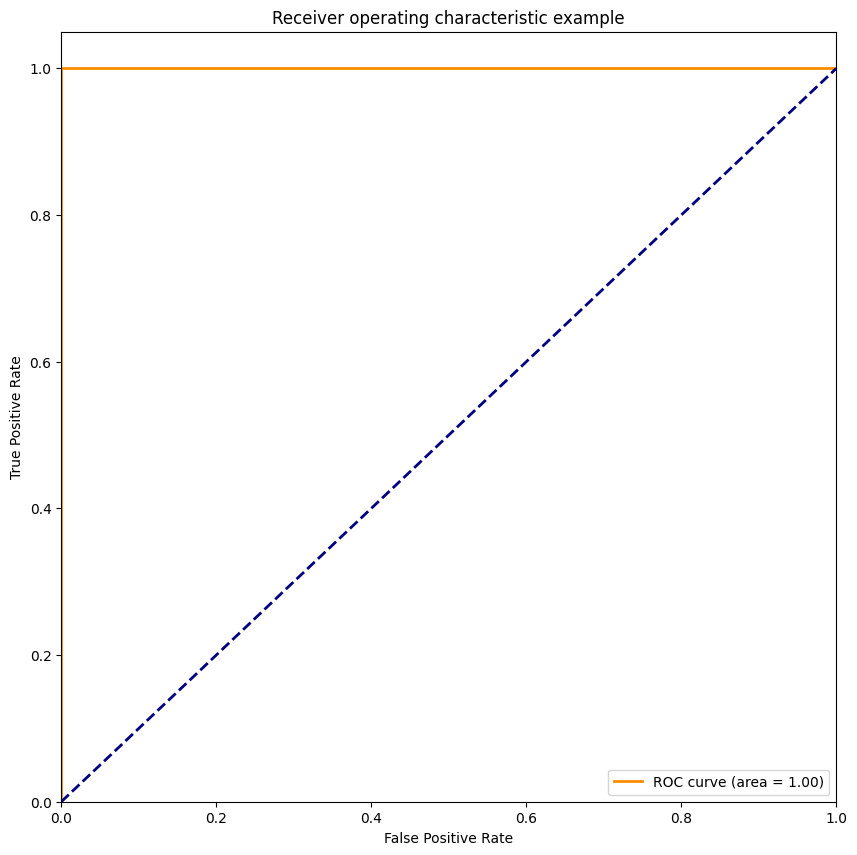

In [88]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

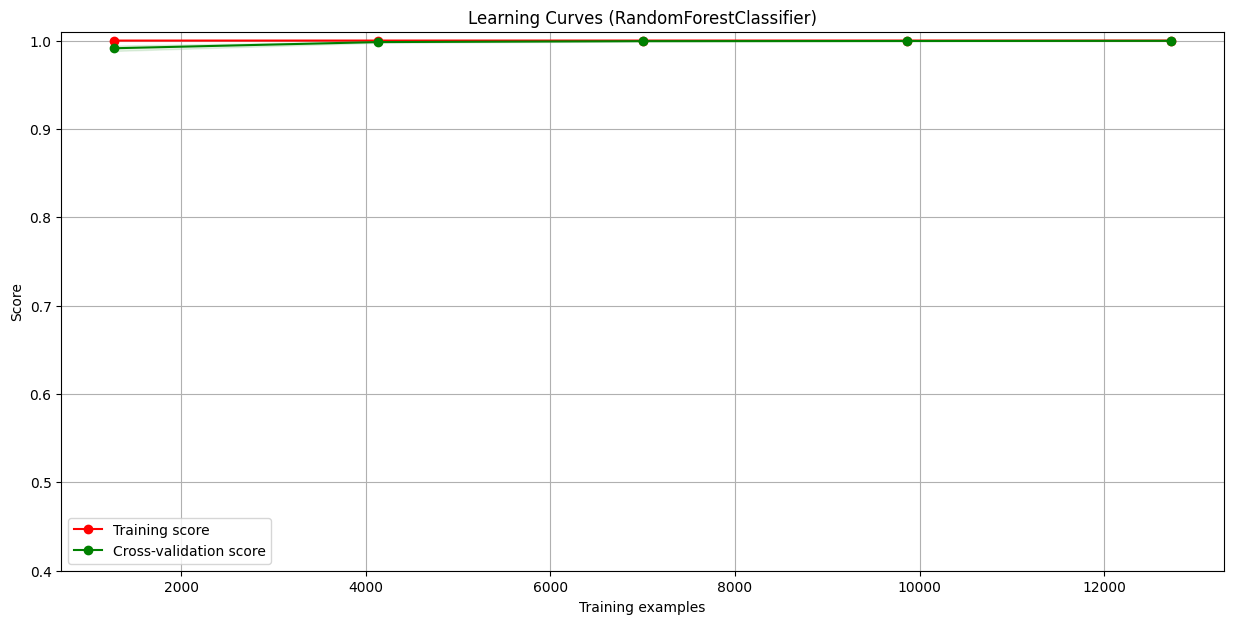

(0.9996838218139843, 0.0006464240777387387)

In [89]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=15,random_state=0,n_estimators=30)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Neural Network

In [90]:
from sklearn.neural_network import MLPClassifier
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(5,4), activation='relu', max_iter=500, random_state=0)
print(clf)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

MLPClassifier(hidden_layer_sizes=(5, 4), max_iter=500, random_state=0)
Accuracy of train: 0.856594995599145
Accuracy of test: 0.8508926326376666


In [91]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(10,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.922670690305545
Accuracy of test: 0.92079456877043


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [92]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(20,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.9732805230730542
Accuracy of test: 0.974352527030425


In [93]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(15,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8943794794417201
Accuracy of test: 0.8911239627860196


In [94]:
%timeit 
mlp_tuned_parameters = {"hidden_layer_sizes": [(16,4),(14, 4),(12,4),(10,4),(20,4)],
                        'activation': ['identity', 'logistic', 'tanh', 'relu'],
                        "solver": ['adam', 'sgd', 'lbfgs'],
                       'learning_rate': ['constant','adaptive']}
mlp = MLPClassifier(max_iter=500)
estimator = GridSearchCV(mlp, mlp_tuned_parameters, n_jobs=5)
estimator.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPClassifier(max_iter=500), n_jobs=5,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(16, 4), (14, 4), (12, 4),
                                                (10, 4), (20, 4)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']})

In [95]:
print(estimator.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (20, 4), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [96]:
mlp = MLPClassifier(hidden_layer_sizes=(20,4), max_iter=500,learning_rate='constant',solver='lbfgs',activation='tanh')
mlp.fit(X_train, y_train)
print("Accuracy of train:",mlp.score(X_train,y_train))
print("Accuracy of test:",mlp.score(x_test,y_test))

Accuracy of train: 0.992078460958129
Accuracy of test: 0.9891878300226301


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [97]:
predictions = mlp.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1987
           1       0.98      0.99      0.99      1990

    accuracy                           0.99      3977
   macro avg       0.99      0.99      0.99      3977
weighted avg       0.99      0.99      0.99      3977



In [98]:
print(confusion_matrix(y_test, predictions))

[[1956   31]
 [  12 1978]]


<Figure size 1500x700 with 0 Axes>

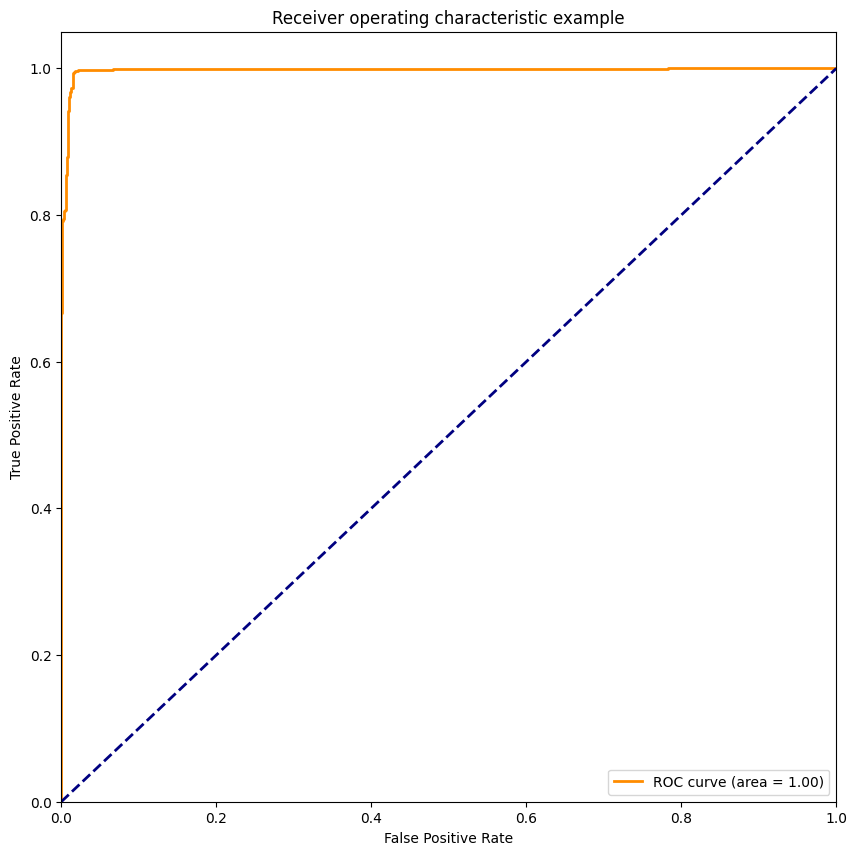

In [99]:
y_score = mlp.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

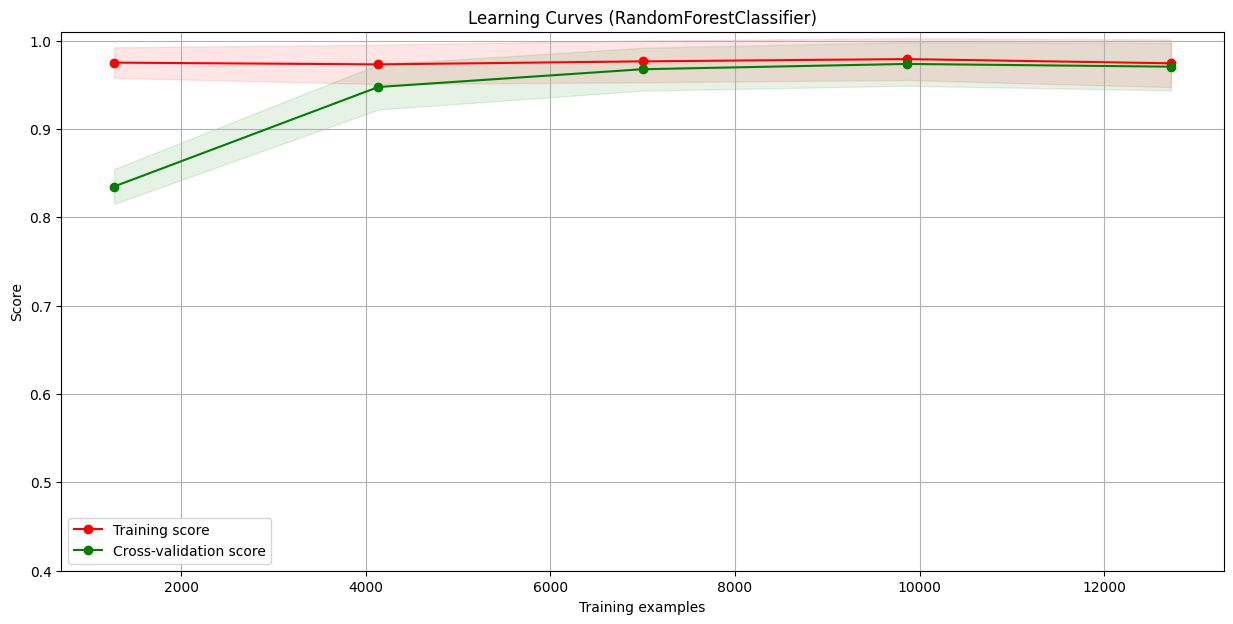

(0.9724349588654355, 0.05776064304288209)

In [100]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(20,4), max_iter=500,learning_rate='constant',solver='lbfgs',activation='tanh')
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)